# Getting Started with AuctionGym
## Effects of Bid Shading in First-Price Auctions

AuctionGym has several configuration options that detail the type of auction, how bidders behave, and how confounded the contextual information is that bidders observe. To avoid clutter, we define these in configuration files.
For the purposes of this introductory notebook, we will ignore some aspects such as repeated runs.

We parse an existing file, detailing a first-price auction with oracle bidders.
We will look into the effects of bid shading on the auctioneer's revenue, social welfare and surplus.
For this, we repeat simulated experiments with the same set of bidders, changing how their bidding strategy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from tqdm.notebook import tqdm

In [2]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DM_Oracle.json')

In [3]:
def run_repeated_auctions():
    # Placeholders for output
    auction_revenue = []
    social_welfare = []
    social_surplus = []
    
    # Instantiate Agent and Auction objects
    agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)

    # Instantiate Auction object
    auction, num_iter, rounds_per_iter, output_dir =\
        instantiate_auction(rng,
                            config,
                            agents2items,
                            agents2item_values,
                            agents,
                            max_slots,
                            embedding_size,
                            embedding_var,
                            obs_embedding_size)

    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    for i in tqdm(range(num_iter)):

        # Simulate impression opportunities
        for _ in range(rounds_per_iter):
            auction.simulate_opportunity()

        # Log 'Gross utility' or welfare
        social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

        # Log 'Net utility' or surplus
        social_surplus.append(sum([agent.net_utility for agent in auction.agents]))
        
        # Update agents (does nothing in this example, as we have truthful oracles)
        # Clear running metrics
        for agent_id, agent in enumerate(auction.agents):
            agent.update(iteration=i)
            agent.clear_utility()
            agent.clear_logs()

        # Log revenue
        auction_revenue.append(auction.revenue)
        auction.clear_revenue()
        
    # Rescale metrics per auction round
    auction_revenue = np.array(auction_revenue) / rounds_per_iter
    social_welfare = np.array(social_welfare) / rounds_per_iter
    social_surplus = np.array(social_surplus) / rounds_per_iter
    
    return auction_revenue, social_welfare, social_surplus

  0%|          | 0/20 [00:00<?, ?it/s]


Oracle, DM (search) 1: 100%|██████████| 32768/32768 [00:04<00:00, 6713.65it/s]


AUC predicting P(win):				 0.7708619733322735



Oracle, DM (search) 2:  78%|███████▊  | 25595/32768 [00:03<00:01, 6618.30it/s]


Epoch 24977: reducing learning rate of group 0 to 3.0000e-04.
Epoch 25082: reducing learning rate of group 0 to 3.0000e-05.
Epoch 25183: reducing learning rate of group 0 to 3.0000e-06.
Epoch 25284: reducing learning rate of group 0 to 3.0000e-07.
Epoch 25385: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 25595
AUC predicting P(win):				 0.744431634375073



Oracle, DM (search) 3:  58%|█████▊    | 18885/32768 [00:02<00:02, 6715.58it/s]


Epoch 18280: reducing learning rate of group 0 to 3.0000e-04.
Epoch 18382: reducing learning rate of group 0 to 3.0000e-05.
Epoch 18483: reducing learning rate of group 0 to 3.0000e-06.
Epoch 18584: reducing learning rate of group 0 to 3.0000e-07.
Epoch 18685: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 18885
AUC predicting P(win):				 0.6184243997066153



Oracle, DM (search) 4:  79%|███████▉  | 25880/32768 [00:03<00:01, 6719.70it/s]


Epoch 25282: reducing learning rate of group 0 to 3.0000e-04.
Epoch 25384: reducing learning rate of group 0 to 3.0000e-05.
Epoch 25485: reducing learning rate of group 0 to 3.0000e-06.
Epoch 25586: reducing learning rate of group 0 to 3.0000e-07.
Epoch 25687: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 25880
AUC predicting P(win):				 0.7505195251016443



Oracle, DM (search) 5:  66%|██████▌   | 21580/32768 [00:03<00:01, 6741.99it/s]


Epoch 20964: reducing learning rate of group 0 to 3.0000e-04.
Epoch 21066: reducing learning rate of group 0 to 3.0000e-05.
Epoch 21167: reducing learning rate of group 0 to 3.0000e-06.
Epoch 21268: reducing learning rate of group 0 to 3.0000e-07.
Epoch 21369: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 21580
AUC predicting P(win):				 0.7522993959212586



Oracle, DM (search) 6:  39%|███▉      | 12791/32768 [00:01<00:02, 6802.54it/s]


Epoch 12182: reducing learning rate of group 0 to 3.0000e-04.
Epoch 12284: reducing learning rate of group 0 to 3.0000e-05.
Epoch 12385: reducing learning rate of group 0 to 3.0000e-06.
Epoch 12486: reducing learning rate of group 0 to 3.0000e-07.
Epoch 12587: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 12791
AUC predicting P(win):				 0.7346428738784372



Oracle, DM (search) 1:  41%|████      | 13328/32768 [00:01<00:02, 6805.79it/s]


Epoch 12724: reducing learning rate of group 0 to 3.0000e-04.
Epoch 12830: reducing learning rate of group 0 to 3.0000e-05.
Epoch 12931: reducing learning rate of group 0 to 3.0000e-06.
Epoch 13032: reducing learning rate of group 0 to 3.0000e-07.
Epoch 13133: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 13328
AUC predicting P(win):				 0.7735162199682254



Oracle, DM (search) 2:  37%|███▋      | 12103/32768 [00:01<00:03, 6780.90it/s]


Epoch 11487: reducing learning rate of group 0 to 3.0000e-04.
Epoch 11589: reducing learning rate of group 0 to 3.0000e-05.
Epoch 11690: reducing learning rate of group 0 to 3.0000e-06.
Epoch 11791: reducing learning rate of group 0 to 3.0000e-07.
Epoch 11892: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 12103
AUC predicting P(win):				 0.7558607880654129



Oracle, DM (search) 3:  40%|███▉      | 12965/32768 [00:01<00:02, 6812.18it/s]


Epoch 12280: reducing learning rate of group 0 to 3.0000e-04.
Epoch 12382: reducing learning rate of group 0 to 3.0000e-05.
Epoch 12483: reducing learning rate of group 0 to 3.0000e-06.
Epoch 12584: reducing learning rate of group 0 to 3.0000e-07.
Epoch 12685: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 12965
AUC predicting P(win):				 0.649758370390239



Oracle, DM (search) 4:  42%|████▏     | 13840/32768 [00:02<00:02, 6634.94it/s]


Epoch 13214: reducing learning rate of group 0 to 3.0000e-04.
Epoch 13316: reducing learning rate of group 0 to 3.0000e-05.
Epoch 13417: reducing learning rate of group 0 to 3.0000e-06.
Epoch 13518: reducing learning rate of group 0 to 3.0000e-07.
Epoch 13619: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 13840
AUC predicting P(win):				 0.7632101568863163



Oracle, DM (search) 5:  24%|██▍       | 7895/32768 [00:01<00:03, 6660.95it/s]


Epoch 07282: reducing learning rate of group 0 to 3.0000e-04.
Epoch 07385: reducing learning rate of group 0 to 3.0000e-05.
Epoch 07486: reducing learning rate of group 0 to 3.0000e-06.
Epoch 07587: reducing learning rate of group 0 to 3.0000e-07.
Epoch 07688: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 7895
AUC predicting P(win):				 0.7335663085476536



Oracle, DM (search) 6:  18%|█▊        | 5867/32768 [00:00<00:04, 6629.21it/s]


Epoch 05159: reducing learning rate of group 0 to 3.0000e-04.
Epoch 05266: reducing learning rate of group 0 to 3.0000e-05.
Epoch 05367: reducing learning rate of group 0 to 3.0000e-06.
Epoch 05468: reducing learning rate of group 0 to 3.0000e-07.
Epoch 05569: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 5867
AUC predicting P(win):				 0.7203612262497565



Oracle, DM (search) 1:  10%|█         | 3417/32768 [00:00<00:04, 6664.04it/s]


Epoch 02768: reducing learning rate of group 0 to 3.0000e-04.
Epoch 02895: reducing learning rate of group 0 to 3.0000e-05.
Epoch 02996: reducing learning rate of group 0 to 3.0000e-06.
Epoch 03097: reducing learning rate of group 0 to 3.0000e-07.
Epoch 03198: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 3417
AUC predicting P(win):				 0.7692114254316952



Oracle, DM (search) 2:  12%|█▏        | 3979/32768 [00:00<00:04, 6528.68it/s]


Epoch 03354: reducing learning rate of group 0 to 3.0000e-04.
Epoch 03484: reducing learning rate of group 0 to 3.0000e-05.
Epoch 03585: reducing learning rate of group 0 to 3.0000e-06.
Epoch 03686: reducing learning rate of group 0 to 3.0000e-07.
Epoch 03787: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 3979
AUC predicting P(win):				 0.7429881668709213



Oracle, DM (search) 3:  12%|█▏        | 4055/32768 [00:00<00:04, 6599.51it/s]


Epoch 03437: reducing learning rate of group 0 to 3.0000e-04.
Epoch 03558: reducing learning rate of group 0 to 3.0000e-05.
Epoch 03659: reducing learning rate of group 0 to 3.0000e-06.
Epoch 03760: reducing learning rate of group 0 to 3.0000e-07.
Epoch 03861: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 4055
AUC predicting P(win):				 0.6948452145659791



Oracle, DM (search) 4:  15%|█▌        | 5053/32768 [00:00<00:04, 6779.48it/s]


Epoch 04436: reducing learning rate of group 0 to 3.0000e-04.
Epoch 04567: reducing learning rate of group 0 to 3.0000e-05.
Epoch 04668: reducing learning rate of group 0 to 3.0000e-06.
Epoch 04769: reducing learning rate of group 0 to 3.0000e-07.
Epoch 04870: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 5053
AUC predicting P(win):				 0.7249754400814471



Oracle, DM (search) 5:  14%|█▍        | 4708/32768 [00:00<00:04, 6654.92it/s]


Epoch 03948: reducing learning rate of group 0 to 3.0000e-04.
Epoch 04061: reducing learning rate of group 0 to 3.0000e-05.
Epoch 04162: reducing learning rate of group 0 to 3.0000e-06.
Epoch 04263: reducing learning rate of group 0 to 3.0000e-07.
Epoch 04364: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 4708
AUC predicting P(win):				 0.7389377110297872



Oracle, DM (search) 6:  10%|█         | 3328/32768 [00:00<00:04, 6743.85it/s]


Epoch 02672: reducing learning rate of group 0 to 3.0000e-04.
Epoch 02819: reducing learning rate of group 0 to 3.0000e-05.
Epoch 02920: reducing learning rate of group 0 to 3.0000e-06.
Epoch 03021: reducing learning rate of group 0 to 3.0000e-07.
Epoch 03122: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 3328
AUC predicting P(win):				 0.7320073218588117



Oracle, DM (search) 1:   4%|▎         | 1152/32768 [00:00<00:04, 6562.87it/s][A


Epoch 00570: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00671: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00772: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00873: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00974: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 1152
AUC predicting P(win):				 0.760656033312265



Oracle, DM (search) 2:  10%|█         | 3413/32768 [00:00<00:04, 6682.21it/s]


Epoch 02766: reducing learning rate of group 0 to 3.0000e-04.
Epoch 02912: reducing learning rate of group 0 to 3.0000e-05.
Epoch 03013: reducing learning rate of group 0 to 3.0000e-06.
Epoch 03114: reducing learning rate of group 0 to 3.0000e-07.
Epoch 03215: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 3413
AUC predicting P(win):				 0.7650467013655194



Oracle, DM (search) 3:   4%|▍         | 1315/32768 [00:00<00:04, 6698.07it/s][A
/Users/keithwu/Documents/GitHub/auction-gym/src/Bidder.py:268: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Epoch 00648: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00791: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00892: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00993: reducing learning rate of group 0 to 3.0000e-07.
Epoch 01094: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 1315
AUC predicting P(win):				 0.702490541305449



Oracle, DM (search) 4:   7%|▋         | 2381/32768 [00:00<00:04, 6619.68it/s]


Epoch 01733: reducing learning rate of group 0 to 3.0000e-04.
Epoch 01875: reducing learning rate of group 0 to 3.0000e-05.
Epoch 01976: reducing learning rate of group 0 to 3.0000e-06.
Epoch 02077: reducing learning rate of group 0 to 3.0000e-07.
Epoch 02178: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2381
AUC predicting P(win):				 0.71013252611733



Oracle, DM (search) 5:   8%|▊         | 2620/32768 [00:00<00:04, 6601.59it/s]


Epoch 01970: reducing learning rate of group 0 to 3.0000e-04.
Epoch 02111: reducing learning rate of group 0 to 3.0000e-05.
Epoch 02212: reducing learning rate of group 0 to 3.0000e-06.
Epoch 02313: reducing learning rate of group 0 to 3.0000e-07.
Epoch 02414: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2620
AUC predicting P(win):				 0.735731353473289



Oracle, DM (search) 6:   5%|▌         | 1665/32768 [00:00<00:04, 6572.35it/s]


Epoch 00853: reducing learning rate of group 0 to 3.0000e-04.
Epoch 01054: reducing learning rate of group 0 to 3.0000e-05.
Epoch 01155: reducing learning rate of group 0 to 3.0000e-06.
Epoch 01256: reducing learning rate of group 0 to 3.0000e-07.
Epoch 01357: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 1665
AUC predicting P(win):				 0.7484107506034329



Oracle, DM (search) 1:   5%|▌         | 1659/32768 [00:00<00:04, 6589.50it/s]


Epoch 01029: reducing learning rate of group 0 to 3.0000e-04.
Epoch 01150: reducing learning rate of group 0 to 3.0000e-05.
Epoch 01251: reducing learning rate of group 0 to 3.0000e-06.
Epoch 01352: reducing learning rate of group 0 to 3.0000e-07.
Epoch 01453: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 1659
AUC predicting P(win):				 0.7892483694468848



Oracle, DM (search) 2:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00334: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00435: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00536: reducing learning rate of group 0 to 3.0000e-06.



Oracle, DM (search) 2:   3%|▎         | 872/32768 [00:00<00:04, 6486.80it/s]


Epoch 00637: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00738: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 872
AUC predicting P(win):				 0.7199310163603814



Oracle, DM (search) 3:   5%|▌         | 1702/32768 [00:00<00:04, 6598.81it/s]


Epoch 01050: reducing learning rate of group 0 to 3.0000e-04.
Epoch 01175: reducing learning rate of group 0 to 3.0000e-05.
Epoch 01276: reducing learning rate of group 0 to 3.0000e-06.
Epoch 01377: reducing learning rate of group 0 to 3.0000e-07.
Epoch 01478: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 1702
AUC predicting P(win):				 0.6896284796132474



Oracle, DM (search) 4:   7%|▋         | 2293/32768 [00:00<00:04, 6712.98it/s]


Epoch 01648: reducing learning rate of group 0 to 3.0000e-04.
Epoch 01750: reducing learning rate of group 0 to 3.0000e-05.
Epoch 01851: reducing learning rate of group 0 to 3.0000e-06.
Epoch 01952: reducing learning rate of group 0 to 3.0000e-07.
Epoch 02053: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2293
AUC predicting P(win):				 0.7517367282052496



Oracle, DM (search) 5:   8%|▊         | 2784/32768 [00:00<00:04, 6686.53it/s]


Epoch 02124: reducing learning rate of group 0 to 3.0000e-04.
Epoch 02271: reducing learning rate of group 0 to 3.0000e-05.
Epoch 02372: reducing learning rate of group 0 to 3.0000e-06.
Epoch 02473: reducing learning rate of group 0 to 3.0000e-07.
Epoch 02574: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2784
AUC predicting P(win):				 0.7276619448712628



Oracle, DM (search) 6:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00266: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00367: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00468: reducing learning rate of group 0 to 3.0000e-06.



Oracle, DM (search) 6:   3%|▎         | 957/32768 [00:00<00:05, 6337.67it/s]


Epoch 00569: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00670: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 957
AUC predicting P(win):				 0.7143245275771027



Oracle, DM (search) 1:   3%|▎         | 846/32768 [00:00<00:04, 6491.46it/s]


Epoch 00298: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00399: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00500: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00601: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00702: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 846
AUC predicting P(win):				 0.7479353590578603



Oracle, DM (search) 2:   2%|▏         | 652/32768 [00:00<00:04, 6511.16it/s]

Epoch 00502: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00603: reducing learning rate of group 0 to 3.0000e-05.


Oracle, DM (search) 2:   3%|▎         | 1066/32768 [00:00<00:04, 6397.21it/s]


Epoch 00704: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00805: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00906: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 1066
AUC predicting P(win):				 0.7525530447834872



Oracle, DM (search) 3:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00594: reducing learning rate of group 0 to 3.0000e-04.



Oracle, DM (search) 3:   2%|▏         | 654/32768 [00:00<00:04, 6535.29it/s]

Epoch 00695: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00796: reducing learning rate of group 0 to 3.0000e-06.


Oracle, DM (search) 3:   4%|▎         | 1192/32768 [00:00<00:04, 6467.50it/s]


Epoch 00897: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00998: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 1192
AUC predicting P(win):				 0.6920958672456023



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00226: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00388: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00489: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00590: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 4:   2%|▏         | 652/32768 [00:00<00:04, 6519.62it/s]

Epoch 00691: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 4:   3%|▎         | 887/32768 [00:00<00:04, 6399.90it/s]

Stopping at Epoch 887


AUC predicting P(win):				 0.6986627592525139



Oracle, DM (search) 5:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00284: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00385: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00486: reducing learning rate of group 0 to 3.0000e-06.



Oracle, DM (search) 5:   3%|▎         | 851/32768 [00:00<00:05, 6268.74it/s]


Epoch 00587: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00688: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 851
AUC predicting P(win):				 0.7507816203404438



Oracle, DM (search) 6:   2%|▏         | 664/32768 [00:00<00:04, 6632.12it/s]

Epoch 00930: reducing learning rate of group 0 to 3.0000e-04.



Oracle, DM (search) 6:   5%|▍         | 1548/32768 [00:00<00:04, 6567.56it/s]


Epoch 01037: reducing learning rate of group 0 to 3.0000e-05.
Epoch 01138: reducing learning rate of group 0 to 3.0000e-06.
Epoch 01239: reducing learning rate of group 0 to 3.0000e-07.
Epoch 01340: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 1548
AUC predicting P(win):				 0.7564819144041877



Oracle, DM (search) 1:   3%|▎         | 984/32768 [00:00<00:04, 6580.79it/s]


Epoch 00412: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00513: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00614: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00715: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00816: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 984
AUC predicting P(win):				 0.7967090759956578



Oracle, DM (search) 2:   2%|▏         | 658/32768 [00:00<00:04, 6573.63it/s]

Epoch 00250: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00351: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00452: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00553: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00654: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 2:   2%|▏         | 765/32768 [00:00<00:04, 6492.30it/s]


Stopping at Epoch 765
AUC predicting P(win):				 0.7292192807621587



Oracle, DM (search) 3:   2%|▏         | 648/32768 [00:00<00:04, 6479.25it/s]

Epoch 00310: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00411: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00512: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00613: reducing learning rate of group 0 to 3.0000e-07.


Oracle, DM (search) 3:   3%|▎         | 911/32768 [00:00<00:04, 6406.89it/s]


Epoch 00714: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 911
AUC predicting P(win):				 0.6866740526941586



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00117: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00218: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00319: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00420: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00521: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 4:   2%|▏         | 630/32768 [00:00<00:05, 6351.90it/s]


Stopping at Epoch 630
AUC predicting P(win):				 0.7045593259874572



Oracle, DM (search) 5:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00159: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00261: reducing learning rate of group 0 to 3.0000e-05.



Oracle, DM (search) 5:   2%|▏         | 635/32768 [00:00<00:05, 6348.16it/s]

Epoch 00362: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00463: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00564: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 779


Oracle, DM (search) 5:   2%|▏         | 779/32768 [00:00<00:05, 6301.82it/s]


AUC predicting P(win):				 0.7525243552004486



Oracle, DM (search) 6:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00190: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00291: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00392: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00493: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 6:   2%|▏         | 702/32768 [00:00<00:05, 6231.04it/s]

Epoch 00594: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 702


AUC predicting P(win):				 0.7211165427703756



Oracle, DM (search) 1:   3%|▎         | 852/32768 [00:00<00:04, 6522.18it/s]


Epoch 00338: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00439: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00540: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00641: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00742: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 852
AUC predicting P(win):				 0.7496791913328776



Oracle, DM (search) 2:   2%|▏         | 658/32768 [00:00<00:04, 6575.62it/s]

Epoch 00344: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00445: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00546: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00647: reducing learning rate of group 0 to 3.0000e-07.


Oracle, DM (search) 2:   3%|▎         | 950/32768 [00:00<00:04, 6483.85it/s]


Epoch 00748: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 950
AUC predicting P(win):				 0.7555924238477689



Oracle, DM (search) 3:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00209: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00310: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00411: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00512: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00613: reducing learning rate of group 0 to 1.0000e-07.



Oracle, DM (search) 3:   2%|▏         | 796/32768 [00:00<00:04, 6414.70it/s]


Stopping at Epoch 796
AUC predicting P(win):				 0.7037295400613972



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00286: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00387: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00488: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00589: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 4:   2%|▏         | 794/32768 [00:00<00:05, 6341.04it/s]


Epoch 00690: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 794
AUC predicting P(win):				 0.7126604410338522



Oracle, DM (search) 5:   7%|▋         | 2367/32768 [00:00<00:04, 6525.07it/s]


Epoch 01634: reducing learning rate of group 0 to 3.0000e-04.
Epoch 01763: reducing learning rate of group 0 to 3.0000e-05.
Epoch 01864: reducing learning rate of group 0 to 3.0000e-06.
Epoch 01965: reducing learning rate of group 0 to 3.0000e-07.
Epoch 02066: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2367
AUC predicting P(win):				 0.7463731942308709



Oracle, DM (search) 6:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00156: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00257: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00358: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00459: reducing learning rate of group 0 to 3.0000e-07.


Oracle, DM (search) 6:   2%|▏         | 600/32768 [00:00<00:04, 6450.29it/s]


Epoch 00560: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 600
AUC predicting P(win):				 0.7299583269022998



Oracle, DM (search) 1:   2%|▏         | 746/32768 [00:00<00:04, 6538.13it/s]


Epoch 00222: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00323: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00424: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00525: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00626: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 746
AUC predicting P(win):				 0.7840937785075717



Oracle, DM (search) 2:   2%|▏         | 652/32768 [00:00<00:04, 6518.17it/s]

Epoch 00244: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00345: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00446: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00547: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00648: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 2:   2%|▏         | 730/32768 [00:00<00:05, 6399.92it/s]


Stopping at Epoch 730
AUC predicting P(win):				 0.7317214990699799



Oracle, DM (search) 3:   2%|▏         | 630/32768 [00:00<00:05, 6294.15it/s]

Epoch 00380: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00481: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00582: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00683: reducing learning rate of group 0 to 3.0000e-07.


Oracle, DM (search) 3:   3%|▎         | 970/32768 [00:00<00:05, 6308.73it/s]


Epoch 00784: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 970
AUC predicting P(win):				 0.6870727206510705



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00243: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00344: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00445: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00546: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 4:   3%|▎         | 831/32768 [00:00<00:04, 6479.97it/s]


Epoch 00647: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 831
AUC predicting P(win):				 0.7357233516419046



Oracle, DM (search) 5:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00341: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00442: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00543: reducing learning rate of group 0 to 3.0000e-06.



Oracle, DM (search) 5:   3%|▎         | 945/32768 [00:00<00:04, 6435.05it/s]

Epoch 00644: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00745: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 945
AUC predicting P(win):				 0.7436757831780042




Oracle, DM (search) 6:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00213: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00314: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00415: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00516: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 6:   3%|▎         | 860/32768 [00:00<00:04, 6449.76it/s]

Epoch 00617: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 860


AUC predicting P(win):				 0.7276367030766784



Oracle, DM (search) 1:   2%|▏         | 758/32768 [00:00<00:04, 6552.56it/s]


Epoch 00207: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00308: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00409: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00510: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00611: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 758
AUC predicting P(win):				 0.7621712229330264



Oracle, DM (search) 2:   2%|▏         | 657/32768 [00:00<00:04, 6567.77it/s]

Epoch 00172: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00273: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00374: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00475: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00576: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 2:   2%|▏         | 750/32768 [00:00<00:04, 6457.05it/s]


Stopping at Epoch 750
AUC predicting P(win):				 0.7540716875036959



Oracle, DM (search) 3:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00107: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00208: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00309: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00410: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00511: reducing learning rate of group 0 to 1.0000e-07.



Oracle, DM (search) 3:   2%|▏         | 721/32768 [00:00<00:05, 6287.11it/s]


Stopping at Epoch 721
AUC predicting P(win):				 0.6982717732630752



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00262: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00363: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00464: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00565: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 4:   2%|▏         | 773/32768 [00:00<00:05, 6294.33it/s]


Epoch 00666: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 773
AUC predicting P(win):				 0.6917759830695736



Oracle, DM (search) 5:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00134: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00235: reducing learning rate of group 0 to 3.0000e-05.



Oracle, DM (search) 5:   2%|▏         | 639/32768 [00:00<00:05, 6381.52it/s]

Epoch 00336: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00437: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00538: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 5:   2%|▏         | 704/32768 [00:00<00:05, 6257.17it/s]


Stopping at Epoch 704
AUC predicting P(win):				 0.7510756551262159



Oracle, DM (search) 6:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00259: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00360: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00461: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00562: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 6:   2%|▏         | 640/32768 [00:00<00:05, 6395.20it/s]

Epoch 00663: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 6:   3%|▎         | 869/32768 [00:00<00:05, 6349.14it/s]


Stopping at Epoch 869
AUC predicting P(win):				 0.7386485654281609



Oracle, DM (search) 1:   2%|▏         | 615/32768 [00:00<00:04, 6628.66it/s]


Epoch 00104: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00205: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00306: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00407: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00508: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 615
AUC predicting P(win):				 0.7671170248163821



Oracle, DM (search) 2:   2%|▏         | 660/32768 [00:00<00:04, 6596.39it/s]

Epoch 00389: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00490: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00591: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00692: reducing learning rate of group 0 to 3.0000e-07.


Oracle, DM (search) 2:   3%|▎         | 944/32768 [00:00<00:04, 6493.34it/s]


Epoch 00793: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 944
AUC predicting P(win):				 0.7371296081170294



Oracle, DM (search) 3:   2%|▏         | 649/32768 [00:00<00:04, 6489.81it/s]

Epoch 00261: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00362: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00463: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00564: reducing learning rate of group 0 to 3.0000e-07.


Oracle, DM (search) 3:   3%|▎         | 938/32768 [00:00<00:04, 6426.91it/s]


Epoch 00665: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 938
AUC predicting P(win):				 0.7076729717157887



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00202: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00303: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00404: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00505: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 4:   2%|▏         | 708/32768 [00:00<00:04, 6443.09it/s]


Epoch 00606: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 708
AUC predicting P(win):				 0.7146478952274107



Oracle, DM (search) 5:   2%|▏         | 651/32768 [00:00<00:04, 6505.77it/s]

Epoch 00385: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00486: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00587: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00688: reducing learning rate of group 0 to 3.0000e-07.


Oracle, DM (search) 5:   3%|▎         | 965/32768 [00:00<00:04, 6462.39it/s]


Epoch 00789: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 965
AUC predicting P(win):				 0.7348408415150911



Oracle, DM (search) 6:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00311: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00412: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00513: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00614: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 6:   3%|▎         | 883/32768 [00:00<00:05, 6348.32it/s]

Epoch 00715: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 883
AUC predicting P(win):				 0.7126095452917248




Oracle, DM (search) 1:   2%|▏         | 744/32768 [00:00<00:04, 6499.70it/s]


Epoch 00162: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00263: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00364: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00465: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00566: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 744
AUC predicting P(win):				 0.7657750901058227



Oracle, DM (search) 2:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00181: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00282: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00383: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00484: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00585: reducing learning rate of group 0 to 1.0000e-07.



Oracle, DM (search) 2:   2%|▏         | 676/32768 [00:00<00:04, 6453.26it/s]


Stopping at Epoch 676
AUC predicting P(win):				 0.7567644100501975



Oracle, DM (search) 3:   2%|▏         | 624/32768 [00:00<00:05, 6234.19it/s]

Epoch 00519: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00648: reducing learning rate of group 0 to 3.0000e-05.


Oracle, DM (search) 3:   4%|▎         | 1159/32768 [00:00<00:04, 6327.03it/s]

Epoch 00749: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00850: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00951: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 1159


AUC predicting P(win):				 0.6514897683669973



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00166: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00267: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00368: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00469: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00570: reducing learning rate of group 0 to 1.0000e-07.



Oracle, DM (search) 4:   2%|▏         | 779/32768 [00:00<00:04, 6424.43it/s]

Stopping at Epoch 779


AUC predicting P(win):				 0.7098344088414181



Oracle, DM (search) 5:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00148: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00249: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00350: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00451: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00552: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 5:   2%|▏         | 601/32768 [00:00<00:05, 6198.37it/s]


Stopping at Epoch 601
AUC predicting P(win):				 0.7595458821359402



Oracle, DM (search) 6:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00111: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00212: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00313: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00414: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00515: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 6:   2%|▏         | 614/32768 [00:00<00:05, 6371.33it/s]

Stopping at Epoch 614
AUC predicting P(win):				 0.7269144724868045




Oracle, DM (search) 1:   3%|▎         | 849/32768 [00:00<00:04, 6497.78it/s]


Epoch 00240: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00341: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00442: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00543: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00644: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 849
AUC predicting P(win):				 0.7775732471604796



Oracle, DM (search) 2:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00345: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00446: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00547: reducing learning rate of group 0 to 3.0000e-06.



Oracle, DM (search) 2:   3%|▎         | 893/32768 [00:00<00:04, 6383.46it/s]


Epoch 00648: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00749: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 893
AUC predicting P(win):				 0.7321633289277094



Oracle, DM (search) 3:   2%|▏         | 634/32768 [00:00<00:05, 6335.20it/s]

Epoch 00431: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00532: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00633: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00734: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00835: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 3:   3%|▎         | 1110/32768 [00:00<00:04, 6400.91it/s]


Stopping at Epoch 1110
AUC predicting P(win):				 0.7193333142803544



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00218: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00319: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00420: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00521: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 4:   2%|▏         | 722/32768 [00:00<00:04, 6409.41it/s]


Epoch 00622: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 722
AUC predicting P(win):				 0.7198630349229959



Oracle, DM (search) 5:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00284: reducing learning rate of group 0 to 3.0000e-04.



Oracle, DM (search) 5:   2%|▏         | 649/32768 [00:00<00:04, 6483.98it/s]

Epoch 00385: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00486: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00587: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00688: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 5:   3%|▎         | 984/32768 [00:00<00:04, 6429.06it/s]


Stopping at Epoch 984
AUC predicting P(win):				 0.7284279440468445



Oracle, DM (search) 6:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00283: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00384: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00485: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00586: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 6:   2%|▏         | 796/32768 [00:00<00:05, 6218.34it/s]


Epoch 00687: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 796
AUC predicting P(win):				 0.7261695932175039



Oracle, DM (search) 1:   3%|▎         | 876/32768 [00:00<00:04, 6558.99it/s]


Epoch 00263: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00364: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00465: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00566: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00667: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 876
AUC predicting P(win):				 0.7549355241777086



Oracle, DM (search) 2:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00269: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00370: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00471: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00572: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 2:   2%|▏         | 791/32768 [00:00<00:04, 6502.21it/s]


Epoch 00673: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 791
AUC predicting P(win):				 0.7694651298566774



Oracle, DM (search) 3:   2%|▏         | 638/32768 [00:00<00:05, 6378.33it/s]

Epoch 00455: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00556: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00657: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00758: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00859: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 3:   3%|▎         | 1095/32768 [00:00<00:04, 6374.76it/s]


Stopping at Epoch 1095
AUC predicting P(win):				 0.6853116411093221



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00158: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00259: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00360: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00461: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00562: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 4:   2%|▏         | 616/32768 [00:00<00:04, 6483.67it/s]


Stopping at Epoch 616
AUC predicting P(win):				 0.7055902700945615



Oracle, DM (search) 5:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00299: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00400: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00501: reducing learning rate of group 0 to 3.0000e-06.



Oracle, DM (search) 5:   2%|▏         | 650/32768 [00:00<00:04, 6489.81it/s]

Epoch 00602: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00703: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 5:   3%|▎         | 901/32768 [00:00<00:04, 6373.62it/s]


Stopping at Epoch 901
AUC predicting P(win):				 0.7513879207240495



Oracle, DM (search) 6:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00143: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00244: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00345: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00446: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00547: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 6:   2%|▏         | 606/32768 [00:00<00:05, 6165.54it/s]

Stopping at Epoch 606
AUC predicting P(win):				 0.733497783350563




Oracle, DM (search) 1:   2%|▏         | 767/32768 [00:00<00:04, 6631.22it/s]


Epoch 00289: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00390: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00491: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00592: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00693: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 767
AUC predicting P(win):				 0.7819507761985638



Oracle, DM (search) 2:   2%|▏         | 634/32768 [00:00<00:05, 6339.24it/s]

Epoch 00368: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00469: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00570: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00671: reducing learning rate of group 0 to 3.0000e-07.


Oracle, DM (search) 2:   3%|▎         | 879/32768 [00:00<00:05, 6260.33it/s]


Epoch 00772: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 879
AUC predicting P(win):				 0.723230207965871



Oracle, DM (search) 3:   2%|▏         | 641/32768 [00:00<00:05, 6403.91it/s]

Epoch 00577: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00678: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00779: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00886: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00987: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 3:   4%|▎         | 1169/32768 [00:00<00:04, 6350.94it/s]


Stopping at Epoch 1169
AUC predicting P(win):				 0.6917199622016825



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00122: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00223: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00324: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00425: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00526: reducing learning rate of group 0 to 1.0000e-07.



Oracle, DM (search) 4:   2%|▏         | 664/32768 [00:00<00:05, 6351.40it/s]

Stopping at Epoch 664


AUC predicting P(win):				 0.7162462176556537



Oracle, DM (search) 5:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00270: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00371: reducing learning rate of group 0 to 3.0000e-05.



Oracle, DM (search) 5:   2%|▏         | 625/32768 [00:00<00:05, 6249.08it/s]

Epoch 00472: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00573: reducing learning rate of group 0 to 3.0000e-07.


Oracle, DM (search) 5:   2%|▏         | 819/32768 [00:00<00:05, 6176.71it/s]


Epoch 00674: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 819
AUC predicting P(win):				 0.7534361874433799



Oracle, DM (search) 6:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00130: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00231: reducing learning rate of group 0 to 3.0000e-05.


Oracle, DM (search) 6:   2%|▏         | 604/32768 [00:00<00:05, 6244.71it/s]

Epoch 00332: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00433: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00534: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 604
AUC predicting P(win):				 0.7357275220352586




Oracle, DM (search) 1:   3%|▎         | 1039/32768 [00:00<00:04, 6681.51it/s][A


Epoch 00326: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00427: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00528: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00629: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00730: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 1039
AUC predicting P(win):				 0.7649821730882265



Oracle, DM (search) 2:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00216: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00317: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00418: reducing learning rate of group 0 to 3.0000e-06.



Oracle, DM (search) 2:   2%|▏         | 729/32768 [00:00<00:05, 6068.28it/s]


Epoch 00519: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00620: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 729
AUC predicting P(win):				 0.757136923730502



Oracle, DM (search) 3:   2%|▏         | 585/32768 [00:00<00:04, 6499.63it/s]


Epoch 00112: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00213: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00314: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00415: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00516: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 585
AUC predicting P(win):				 0.7021274243522222



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00141: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00242: reducing learning rate of group 0 to 3.0000e-05.


Oracle, DM (search) 4:   2%|▏         | 638/32768 [00:00<00:05, 6418.39it/s]


Epoch 00343: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00444: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00545: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 638
AUC predicting P(win):				 0.7190058666225981



Oracle, DM (search) 5:   2%|▏         | 656/32768 [00:00<00:04, 6552.54it/s]

Epoch 00284: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00385: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00486: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00587: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00688: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 5:   2%|▏         | 795/32768 [00:00<00:04, 6459.21it/s]


Stopping at Epoch 795
AUC predicting P(win):				 0.7478636710531058



Oracle, DM (search) 6:   2%|▏         | 578/32768 [00:00<00:05, 6283.91it/s]

Epoch 00134: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00235: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00336: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00437: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00538: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 578
AUC predicting P(win):				 0.7282947859231026




Oracle, DM (search) 1:   2%|▏         | 616/32768 [00:00<00:04, 6479.92it/s]


Epoch 00138: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00239: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00340: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00441: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00542: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 616
AUC predicting P(win):				 0.7641352712733942



Oracle, DM (search) 2:   2%|▏         | 661/32768 [00:00<00:04, 6605.60it/s]

Epoch 00264: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00365: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00466: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00567: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00668: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 2:   2%|▏         | 771/32768 [00:00<00:04, 6495.33it/s]


Stopping at Epoch 771
AUC predicting P(win):				 0.7428845479507838



Oracle, DM (search) 3:   2%|▏         | 637/32768 [00:00<00:05, 6368.14it/s]

Epoch 00358: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00459: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00560: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00661: reducing learning rate of group 0 to 3.0000e-07.


Oracle, DM (search) 3:   3%|▎         | 931/32768 [00:00<00:05, 6365.50it/s]


Epoch 00762: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 931
AUC predicting P(win):				 0.6882497161629134



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00266: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00367: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00468: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00569: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 4:   3%|▎         | 977/32768 [00:00<00:04, 6476.03it/s]

Epoch 00670: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 977
AUC predicting P(win):				 0.7338811716873841




Oracle, DM (search) 5:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00468: reducing learning rate of group 0 to 3.0000e-04.



Oracle, DM (search) 5:   2%|▏         | 650/32768 [00:00<00:04, 6493.06it/s]

Epoch 00569: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00670: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00771: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00872: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 5:   3%|▎         | 977/32768 [00:00<00:04, 6388.91it/s]


Stopping at Epoch 977
AUC predicting P(win):				 0.7579420489836703



Oracle, DM (search) 6:   2%|▏         | 623/32768 [00:00<00:05, 6223.40it/s]

Epoch 00135: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00236: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00337: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00438: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00539: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 6:   2%|▏         | 683/32768 [00:00<00:05, 6111.69it/s]

Stopping at Epoch 683
AUC predicting P(win):				 0.7276495562642029




Oracle, DM (search) 1:   2%|▏         | 676/32768 [00:00<00:04, 6448.97it/s]


Epoch 00184: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00285: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00386: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00487: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00588: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 676
AUC predicting P(win):				 0.7756000520036135



Oracle, DM (search) 2:   2%|▏         | 611/32768 [00:00<00:04, 6547.86it/s]


Epoch 00107: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00208: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00309: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00410: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00511: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 611
AUC predicting P(win):				 0.7446193710043965



Oracle, DM (search) 3:   2%|▏         | 631/32768 [00:00<00:05, 6308.10it/s]

Epoch 00238: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00339: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00440: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00541: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00642: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 3:   2%|▏         | 798/32768 [00:00<00:05, 6216.11it/s]


Stopping at Epoch 798
AUC predicting P(win):				 0.7028752609046132



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00200: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00301: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00402: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00503: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 4:   2%|▏         | 748/32768 [00:00<00:05, 6145.50it/s]


Epoch 00604: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 748
AUC predicting P(win):				 0.6983833425561576



Oracle, DM (search) 5:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00108: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00209: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00310: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00411: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00512: reducing learning rate of group 0 to 1.0000e-07.



Oracle, DM (search) 5:   2%|▏         | 610/32768 [00:00<00:05, 5793.08it/s]


Stopping at Epoch 610
AUC predicting P(win):				 0.7441834968263127



Oracle, DM (search) 6:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00149: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00250: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00351: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00452: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00553: reducing learning rate of group 0 to 1.0000e-07.



Oracle, DM (search) 6:   2%|▏         | 750/32768 [00:00<00:05, 6089.94it/s]

Stopping at Epoch 750
AUC predicting P(win):				 0.7334479420721707




Oracle, DM (search) 1:   2%|▏         | 718/32768 [00:00<00:04, 6624.35it/s]


Epoch 00224: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00325: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00426: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00527: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00628: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 718
AUC predicting P(win):				 0.7623625244839232



Oracle, DM (search) 2:   2%|▏         | 608/32768 [00:00<00:04, 6515.99it/s]


Epoch 00105: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00206: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00307: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00408: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00509: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 608
AUC predicting P(win):				 0.7421040530089253



Oracle, DM (search) 3:   2%|▏         | 628/32768 [00:00<00:05, 6276.68it/s]

Epoch 00439: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00540: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00641: reducing learning rate of group 0 to 3.0000e-06.


Oracle, DM (search) 3:   3%|▎         | 1030/32768 [00:00<00:05, 6229.06it/s]


Epoch 00742: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00843: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 1030
AUC predicting P(win):				 0.6682025799871978



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00325: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00426: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00527: reducing learning rate of group 0 to 3.0000e-06.



Oracle, DM (search) 4:   3%|▎         | 838/32768 [00:00<00:05, 6380.78it/s]

Epoch 00628: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00729: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 838
AUC predicting P(win):				 0.7424786756453423




Oracle, DM (search) 5:   2%|▏         | 656/32768 [00:00<00:04, 6555.68it/s]

Epoch 00183: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00284: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00385: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00486: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00587: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 689


Oracle, DM (search) 5:   2%|▏         | 689/32768 [00:00<00:04, 6429.35it/s]


AUC predicting P(win):				 0.7570506986352266



Oracle, DM (search) 6:   2%|▏         | 647/32768 [00:00<00:04, 6466.37it/s]

Epoch 00269: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00370: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00471: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00572: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00673: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 6:   2%|▏         | 771/32768 [00:00<00:05, 6332.02it/s]


Stopping at Epoch 771
AUC predicting P(win):				 0.7148055210203405



Oracle, DM (search) 1:   2%|▏         | 692/32768 [00:00<00:04, 6549.16it/s]


Epoch 00180: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00281: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00382: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00483: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00584: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 692
AUC predicting P(win):				 0.7731466524665624



Oracle, DM (search) 2:   2%|▏         | 654/32768 [00:00<00:04, 6535.16it/s]

Epoch 00338: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00439: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00540: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00641: reducing learning rate of group 0 to 3.0000e-07.


Oracle, DM (search) 2:   3%|▎         | 908/32768 [00:00<00:04, 6413.83it/s]


Epoch 00742: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 908
AUC predicting P(win):				 0.7399117252744656



Oracle, DM (search) 3:   2%|▏         | 630/32768 [00:00<00:05, 6298.05it/s]

Epoch 00647: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00748: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00849: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00950: reducing learning rate of group 0 to 3.0000e-07.


Oracle, DM (search) 3:   4%|▍         | 1268/32768 [00:00<00:04, 6337.27it/s]


Epoch 01051: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 1268
AUC predicting P(win):				 0.7221157885288575



Oracle, DM (search) 4:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00279: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00380: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00481: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00582: reducing learning rate of group 0 to 3.0000e-07.



Oracle, DM (search) 4:   2%|▏         | 774/32768 [00:00<00:04, 6471.30it/s]


Epoch 00683: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 774
AUC predicting P(win):				 0.6838945684955885



Oracle, DM (search) 5:   2%|▏         | 649/32768 [00:00<00:04, 6540.36it/s]

Epoch 00200: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00301: reducing learning rate of group 0 to 3.0000e-05.
Epoch 00402: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00503: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00604: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 649
AUC predicting P(win):				 0.741023873000839




Oracle, DM (search) 6:   0%|          | 0/32768 [00:00<?, ?it/s]

Epoch 00239: reducing learning rate of group 0 to 3.0000e-04.
Epoch 00340: reducing learning rate of group 0 to 3.0000e-05.



Oracle, DM (search) 6:   2%|▏         | 641/32768 [00:00<00:05, 6402.82it/s]

Epoch 00441: reducing learning rate of group 0 to 3.0000e-06.
Epoch 00542: reducing learning rate of group 0 to 3.0000e-07.
Epoch 00643: reducing learning rate of group 0 to 1.0000e-07.


Oracle, DM (search) 6:   3%|▎         | 846/32768 [00:00<00:05, 6339.36it/s]


Stopping at Epoch 846
AUC predicting P(win):				 0.7316823361991244


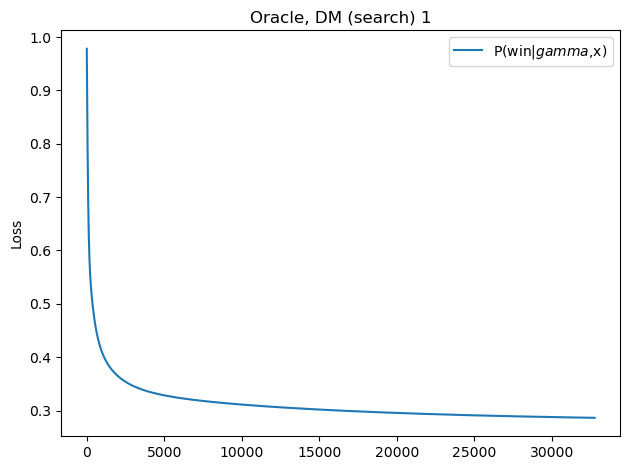

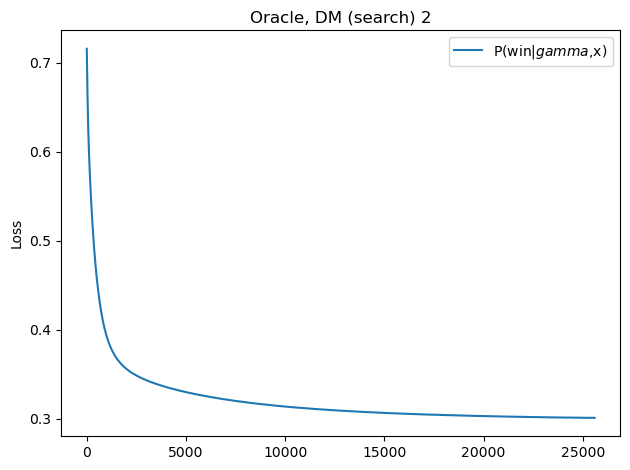

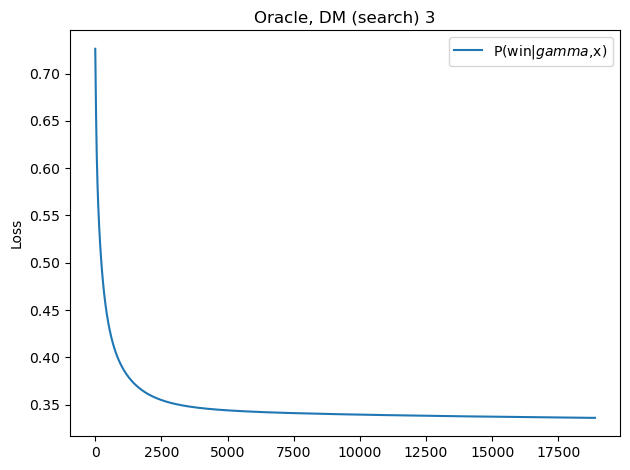

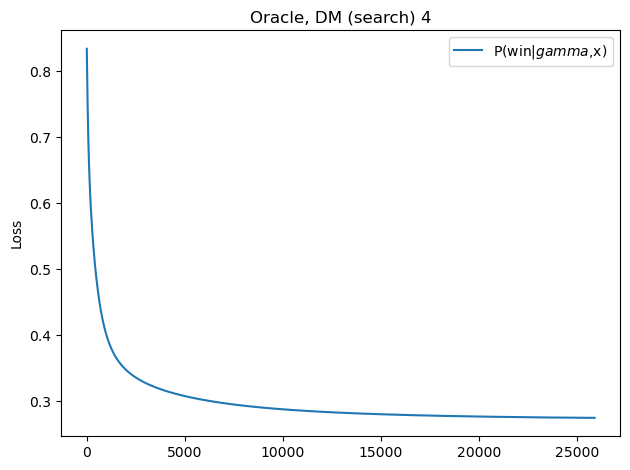

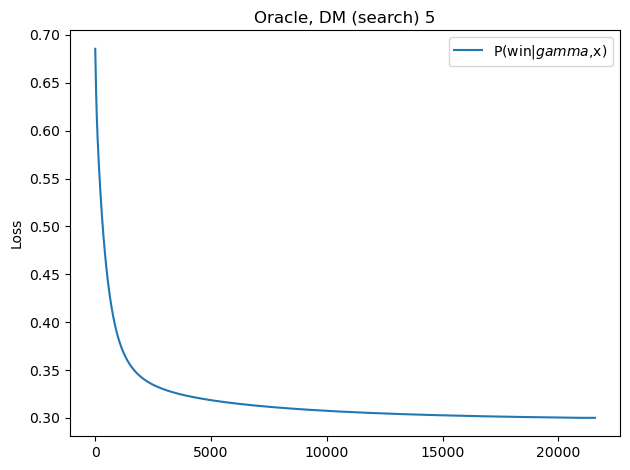

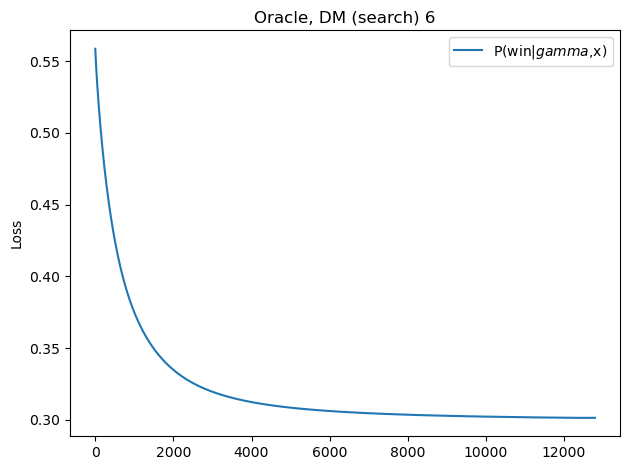

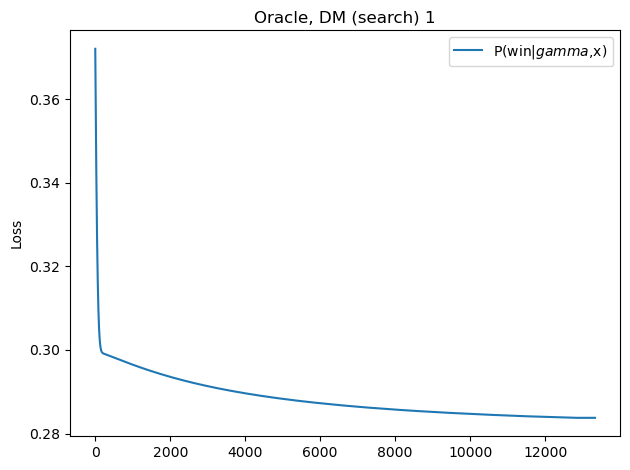

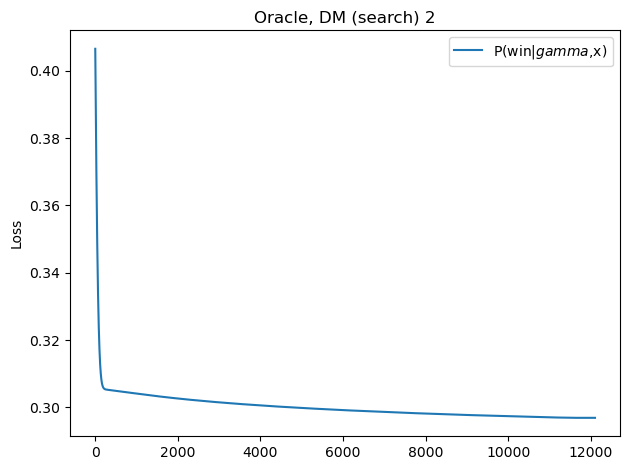

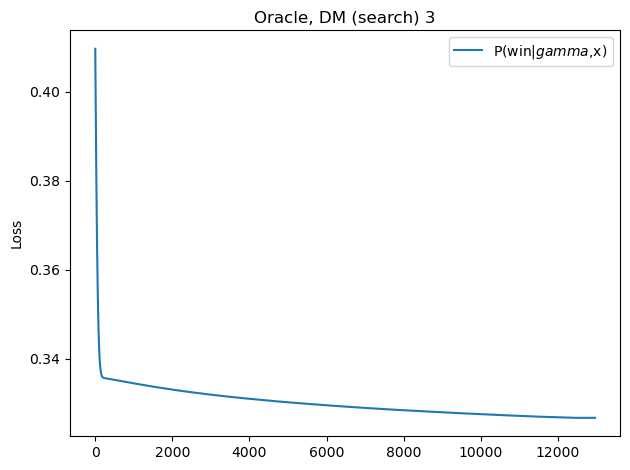

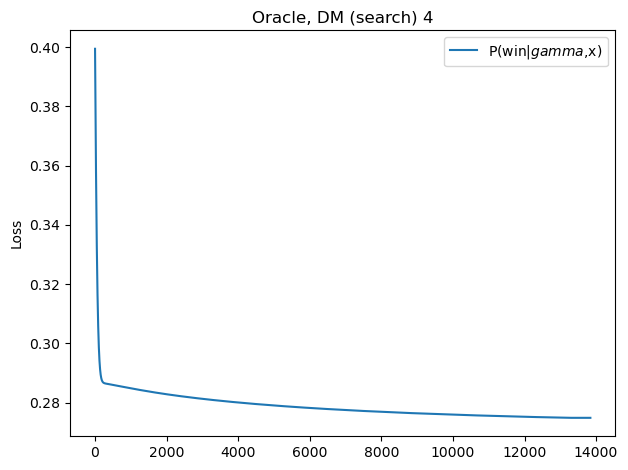

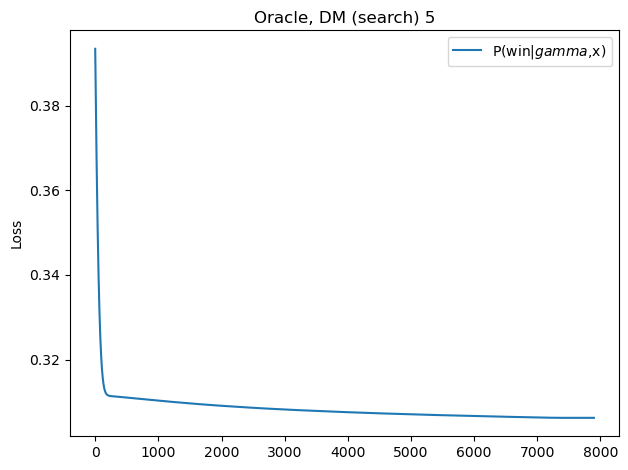

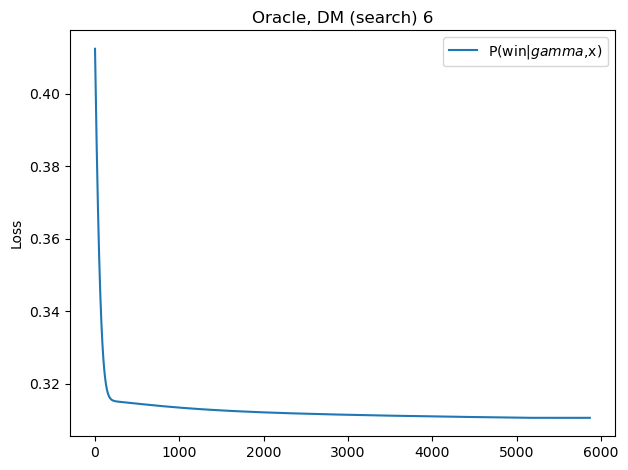

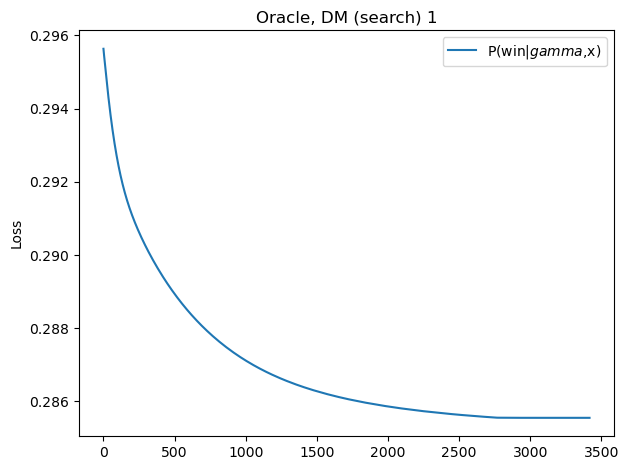

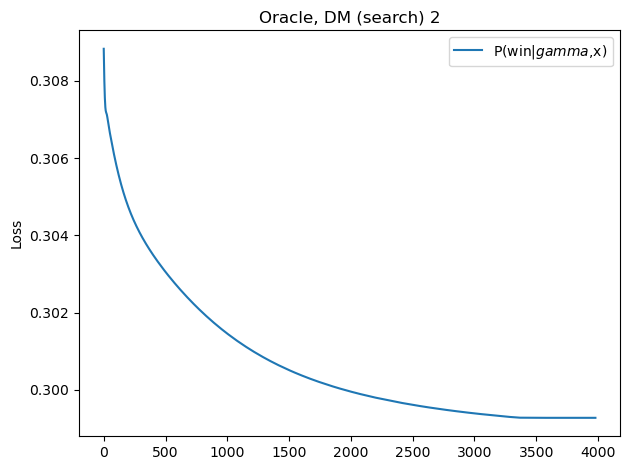

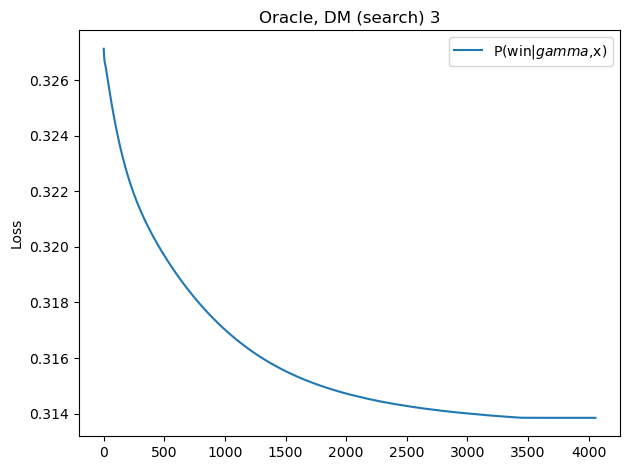

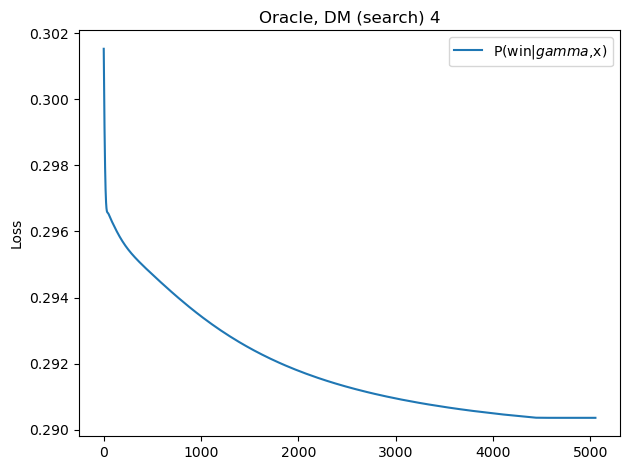

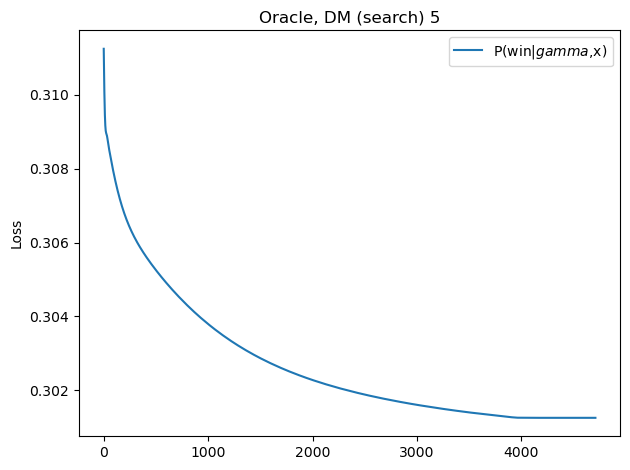

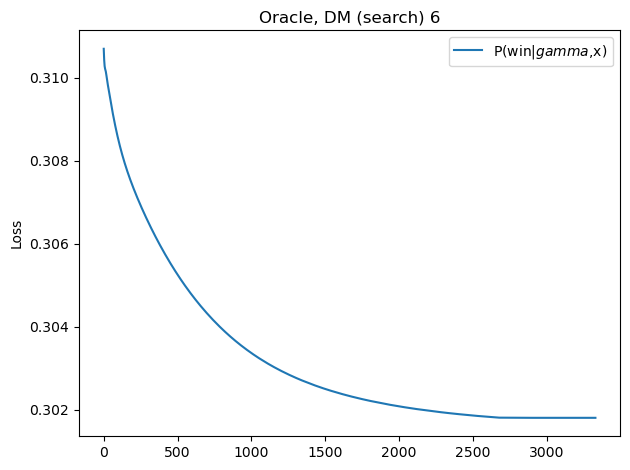

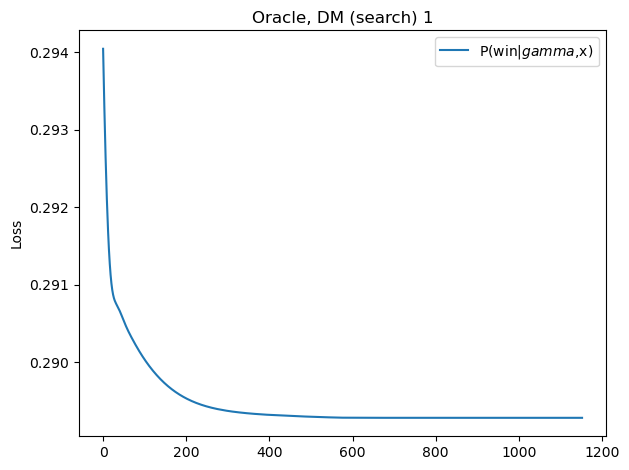

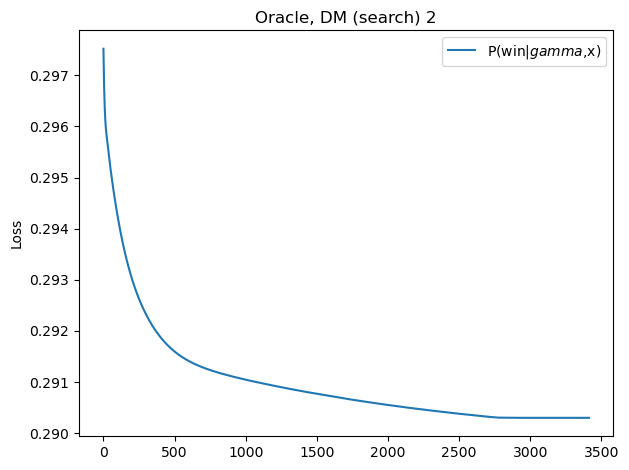

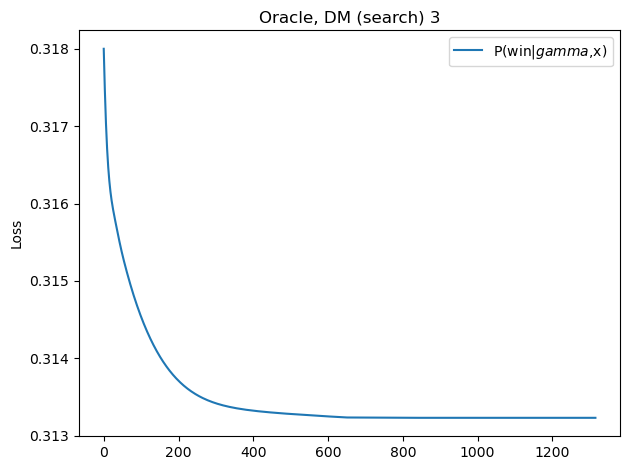

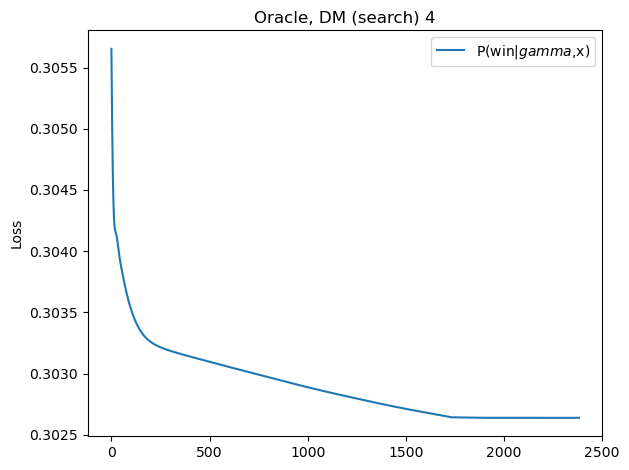

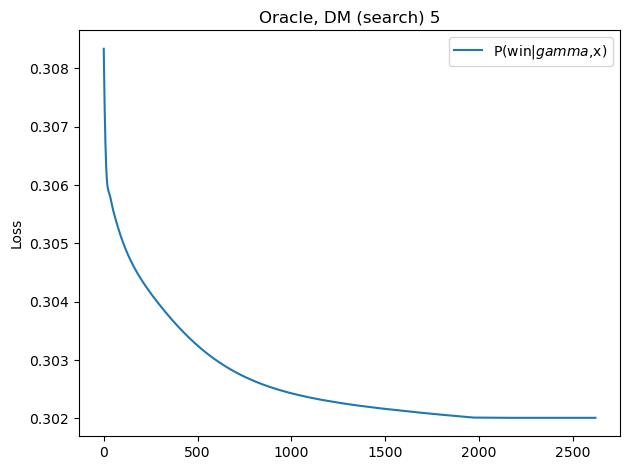

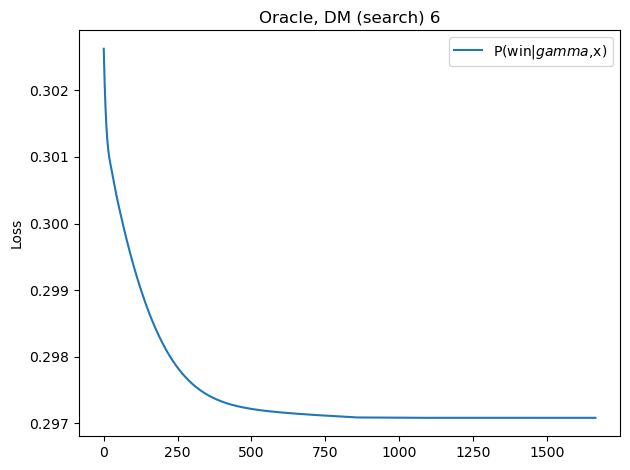

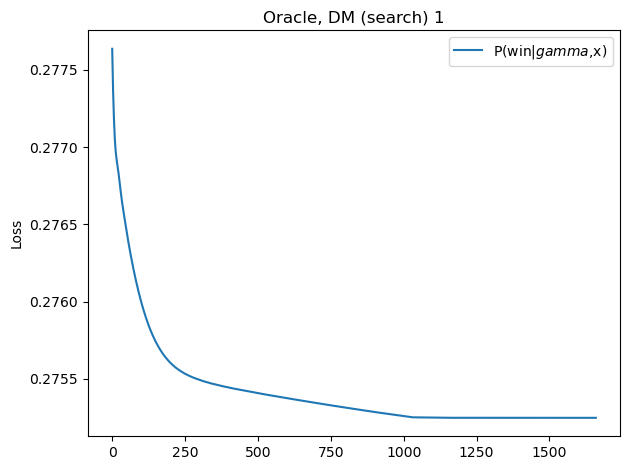

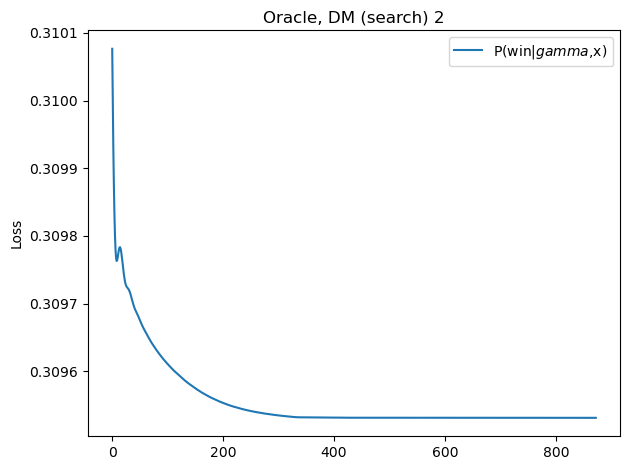

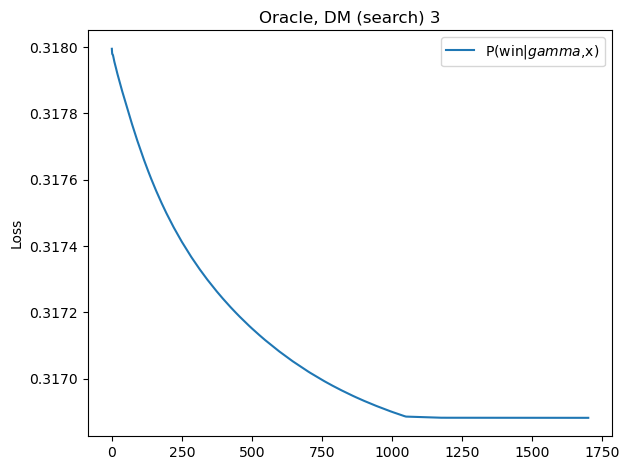

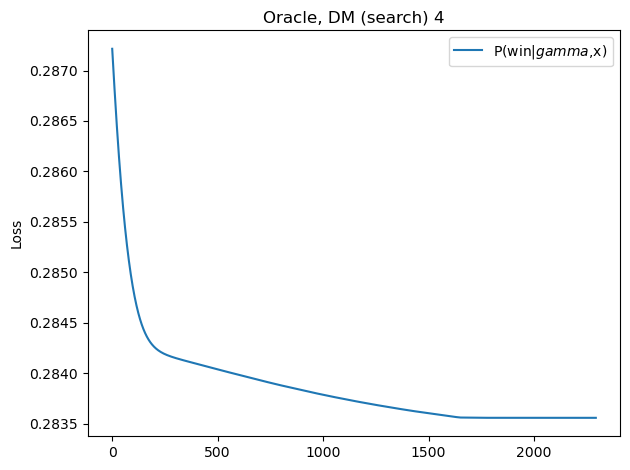

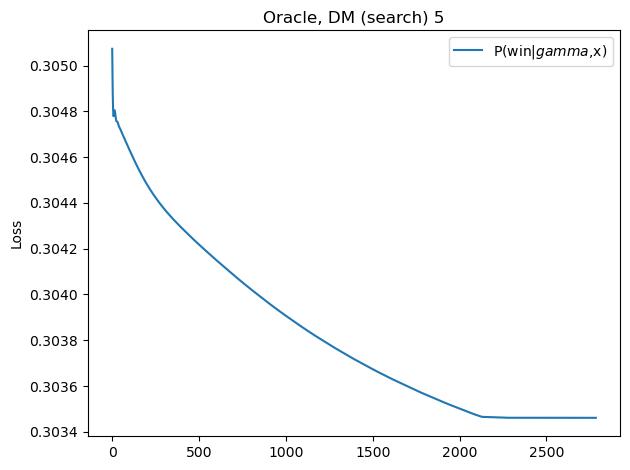

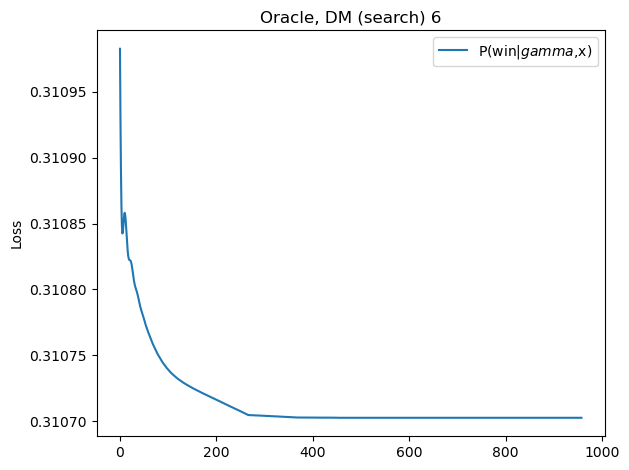

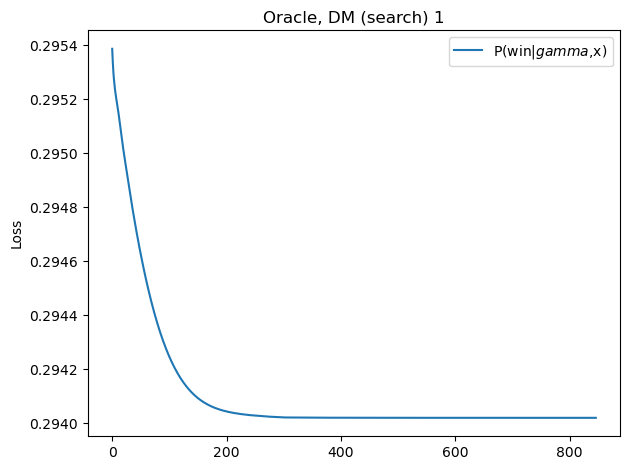

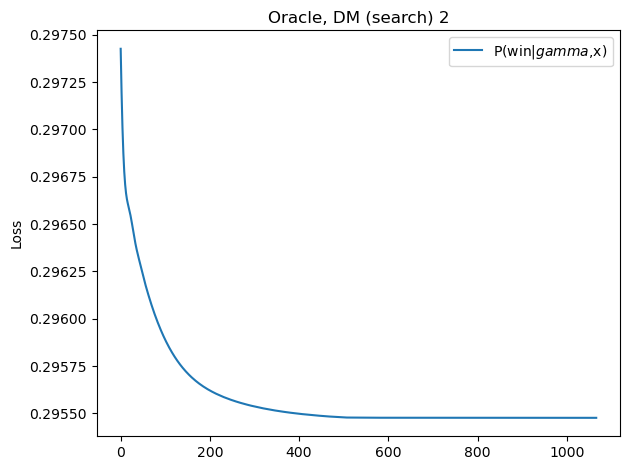

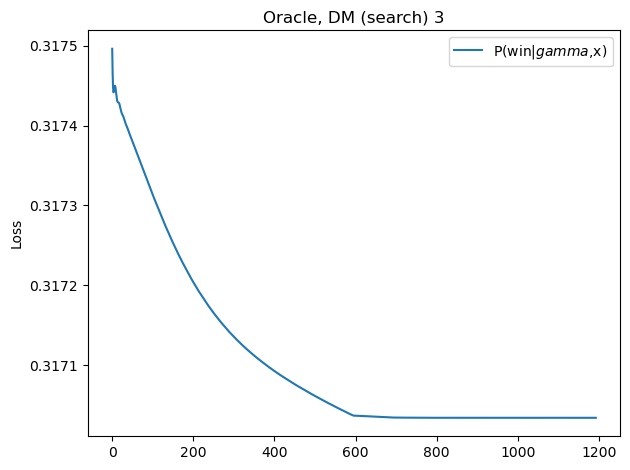

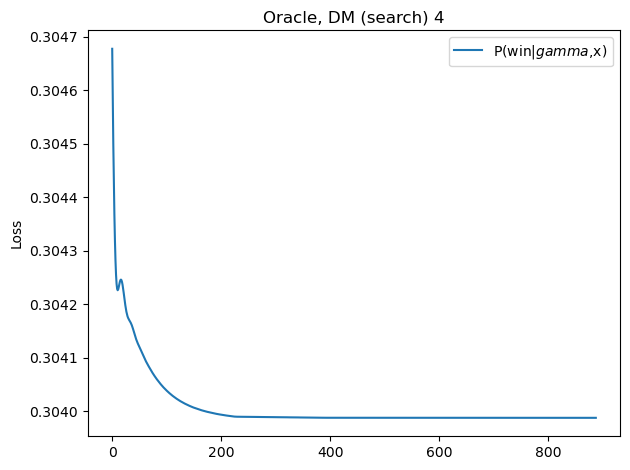

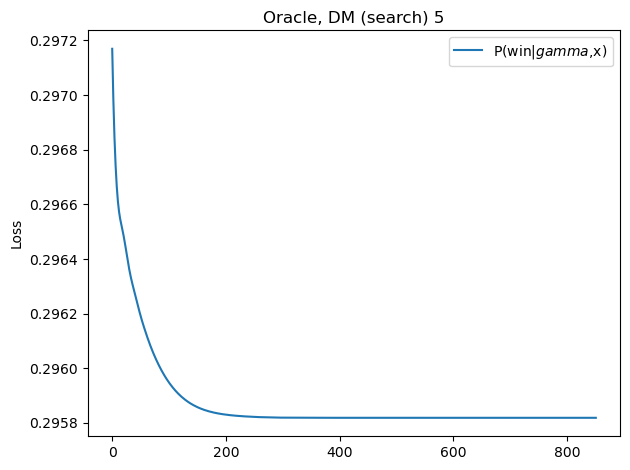

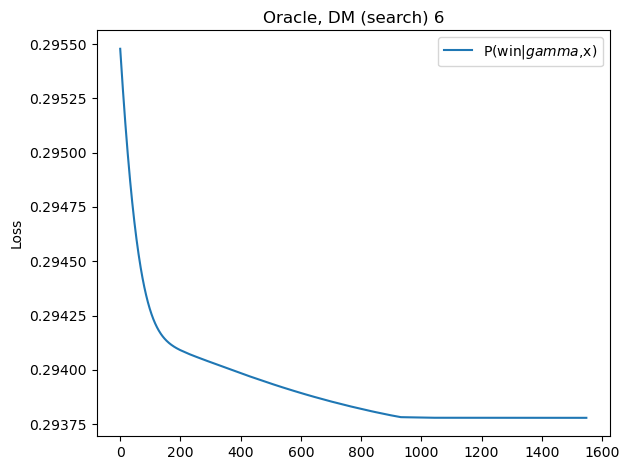

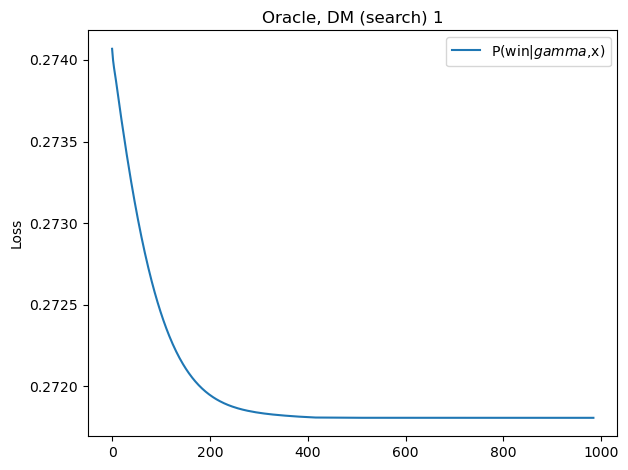

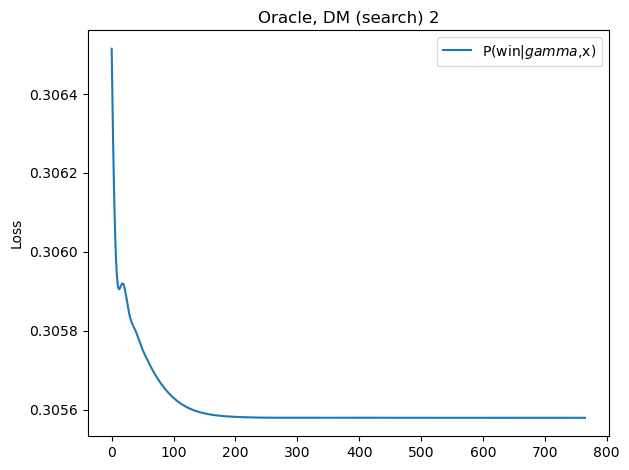

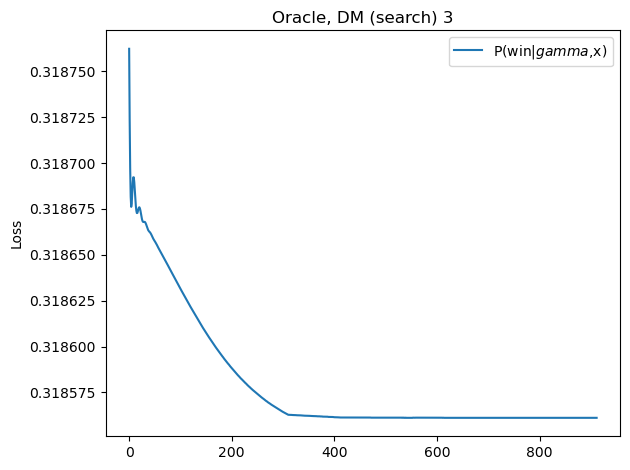

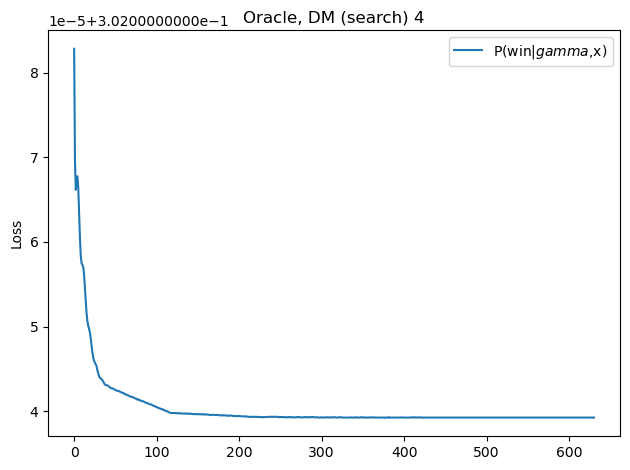

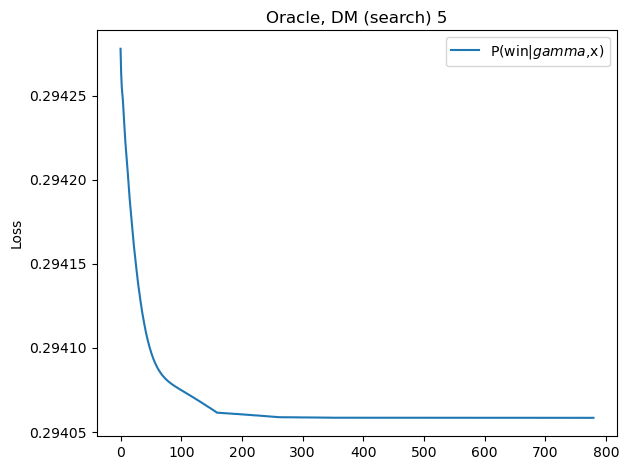

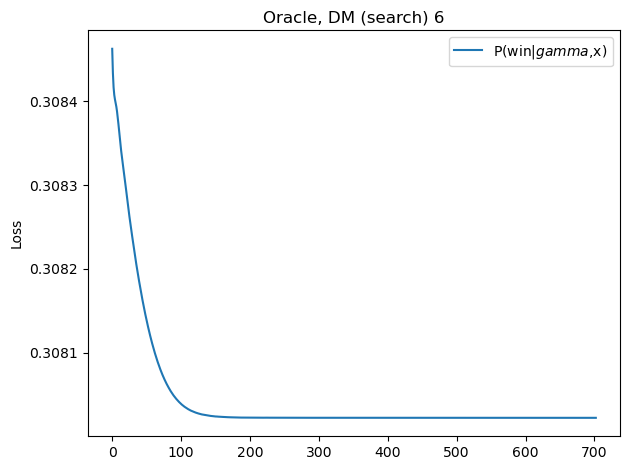

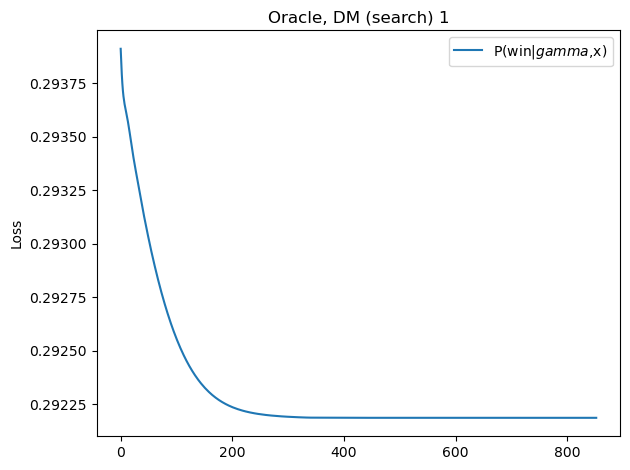

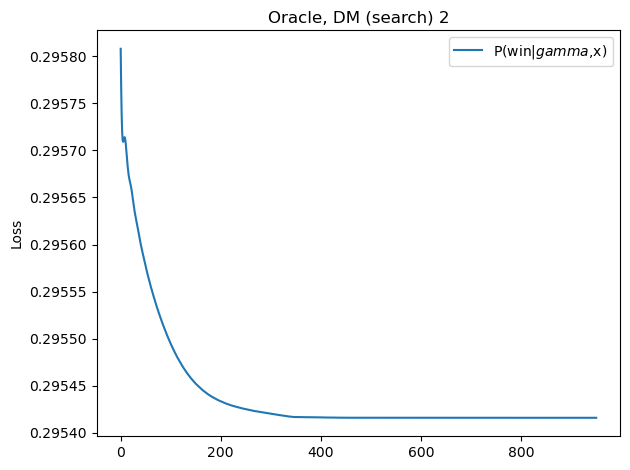

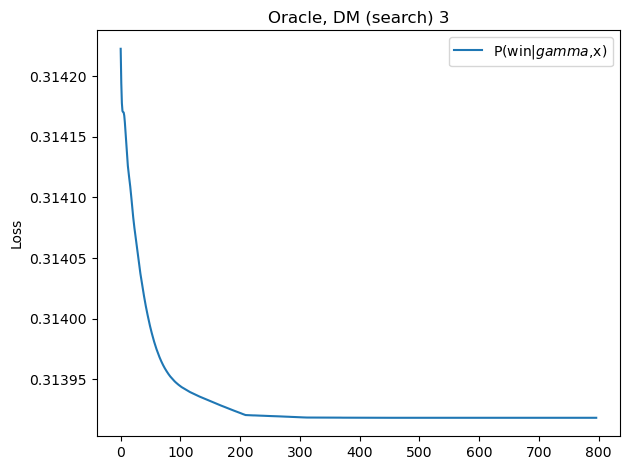

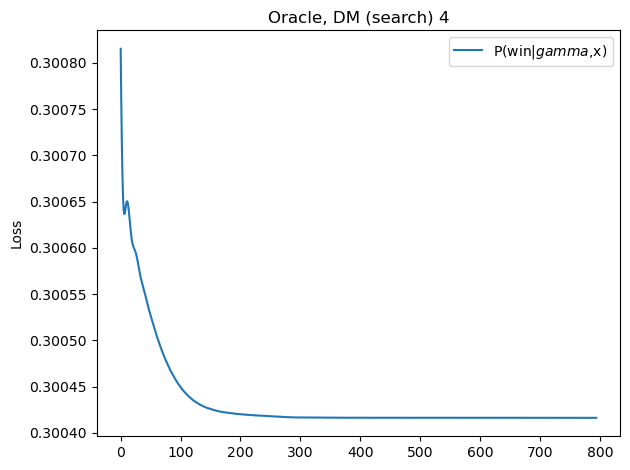

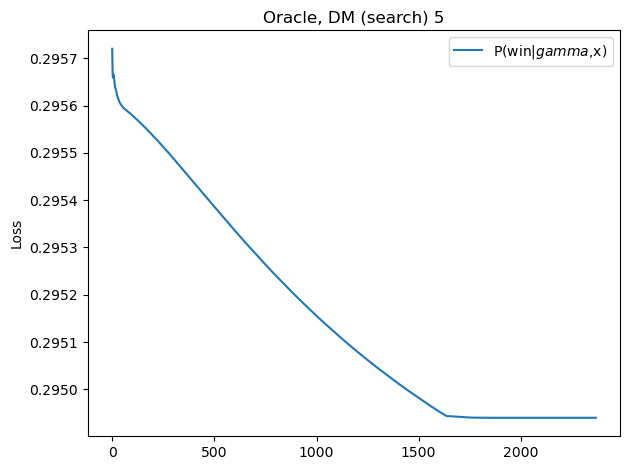

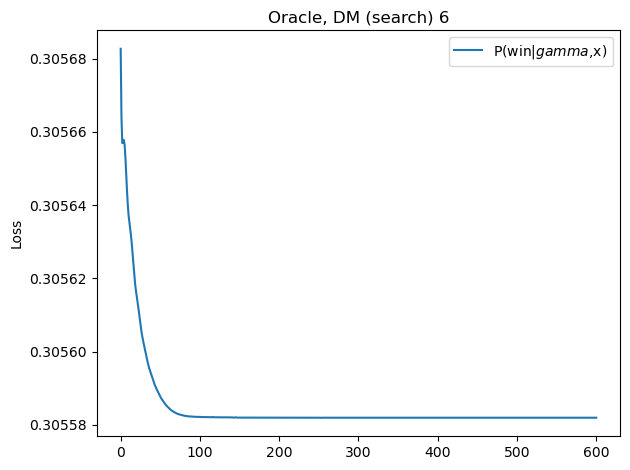

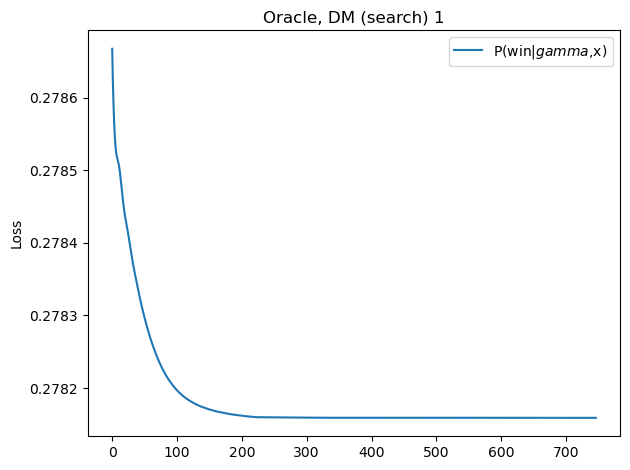

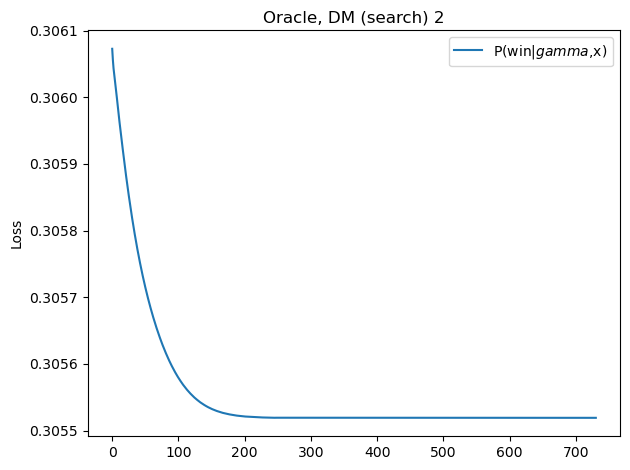

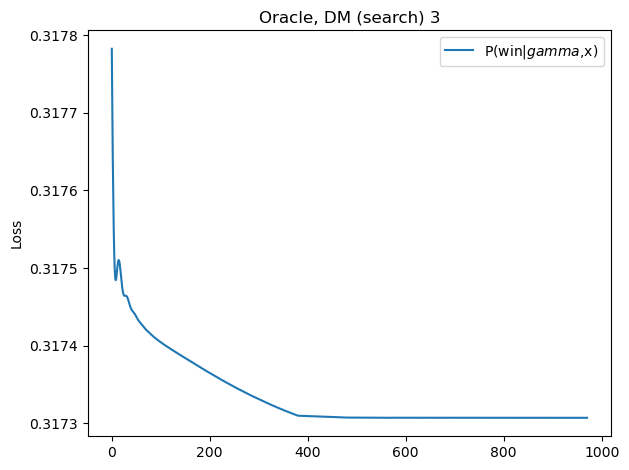

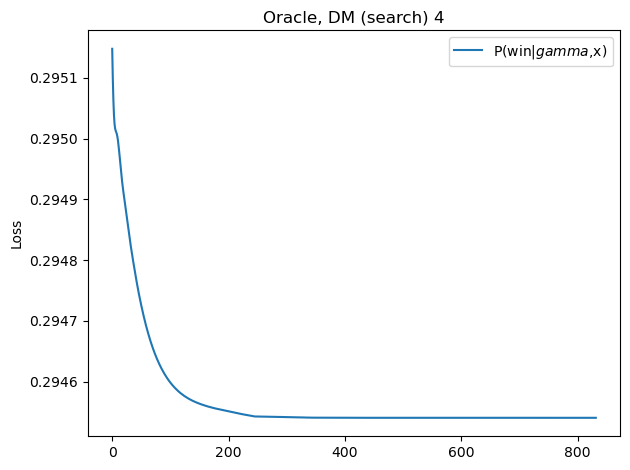

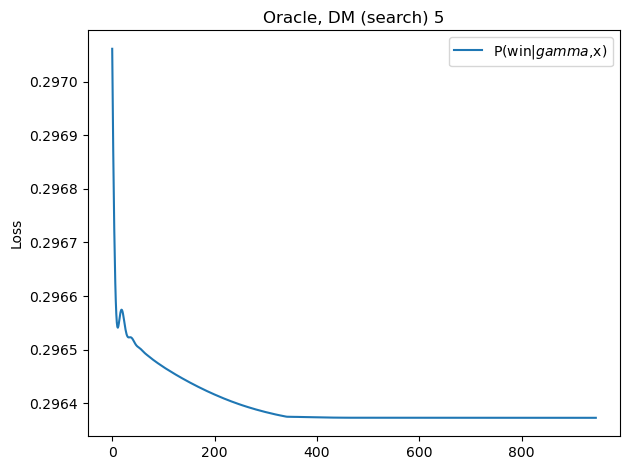

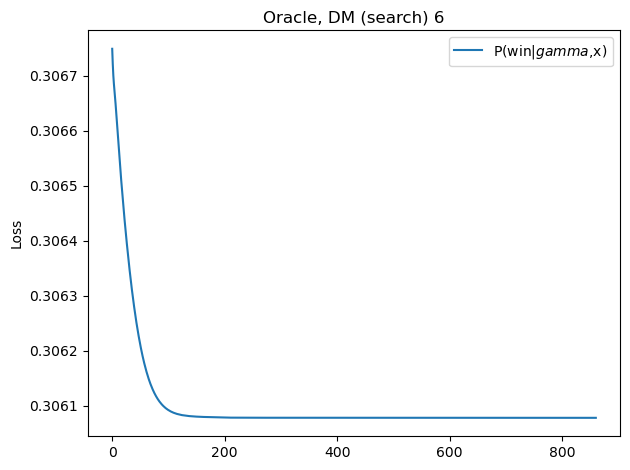

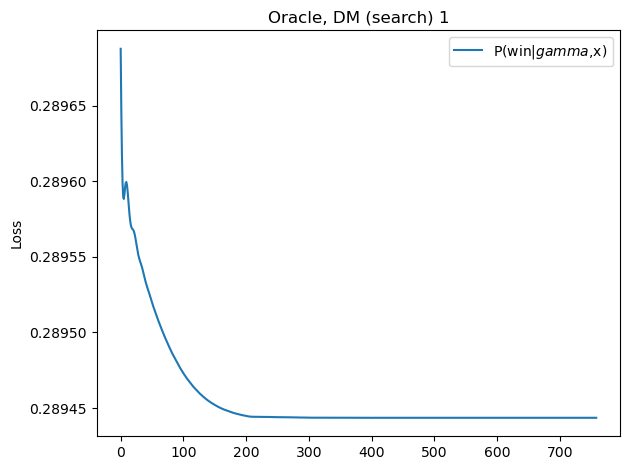

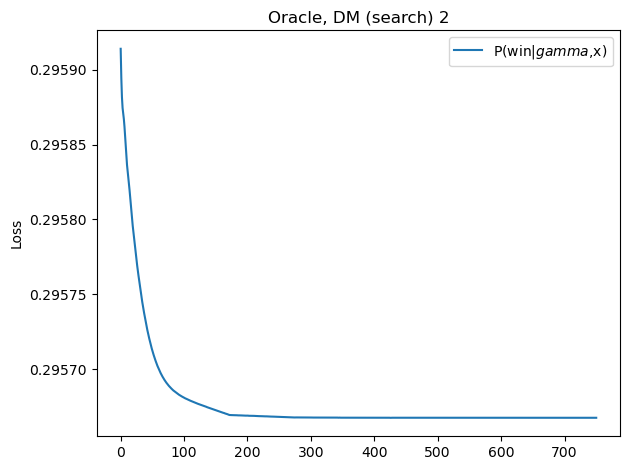

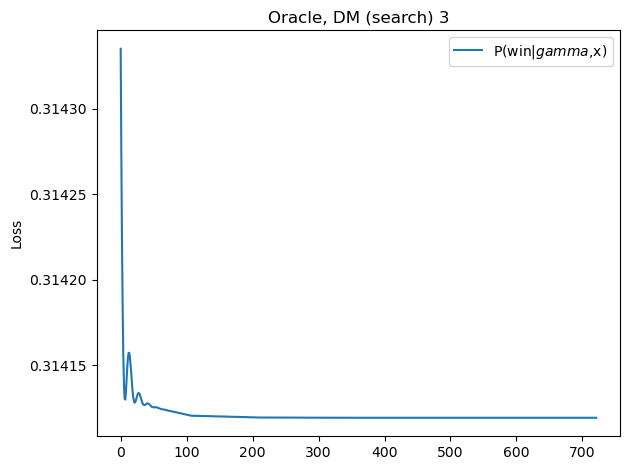

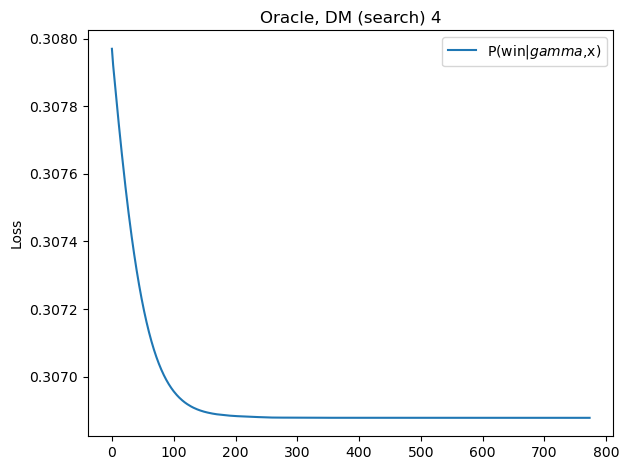

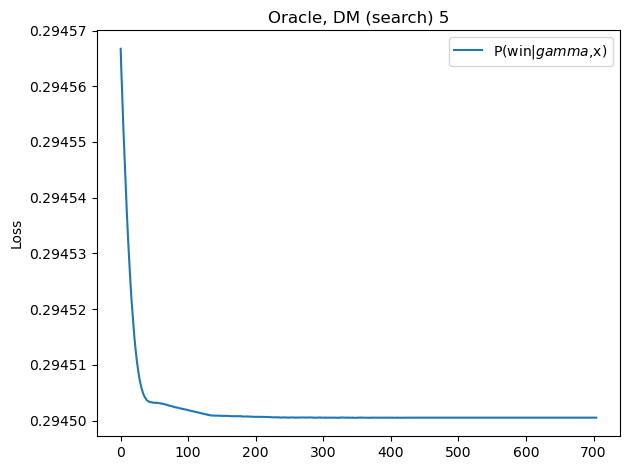

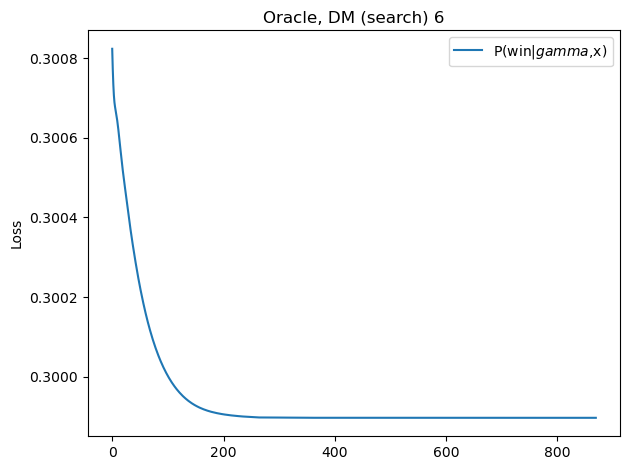

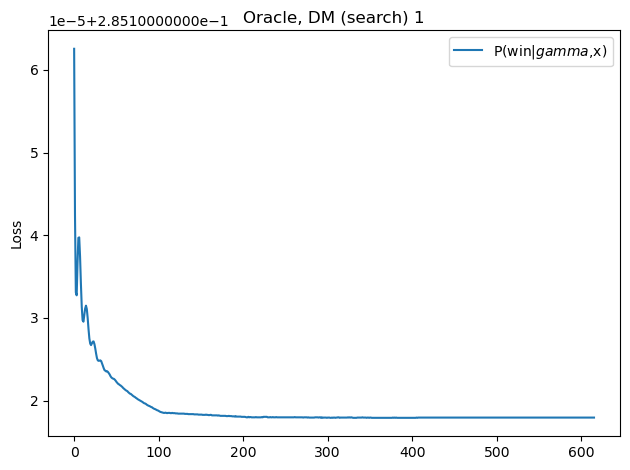

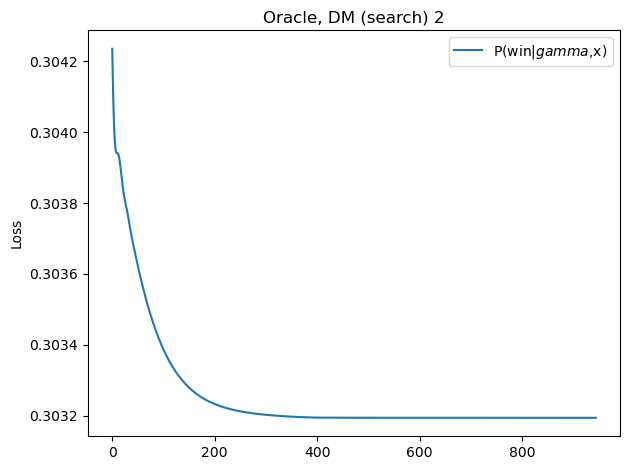

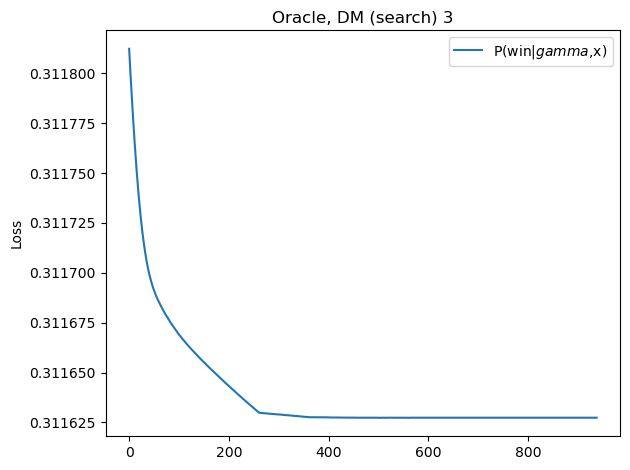

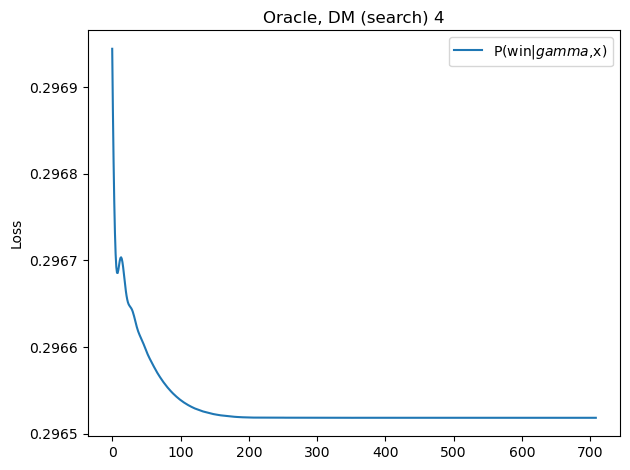

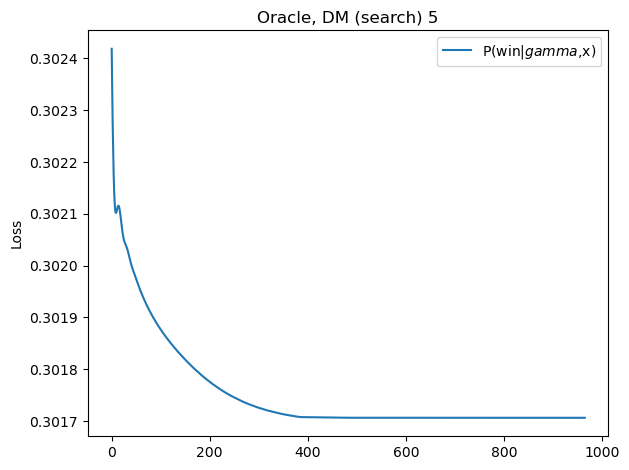

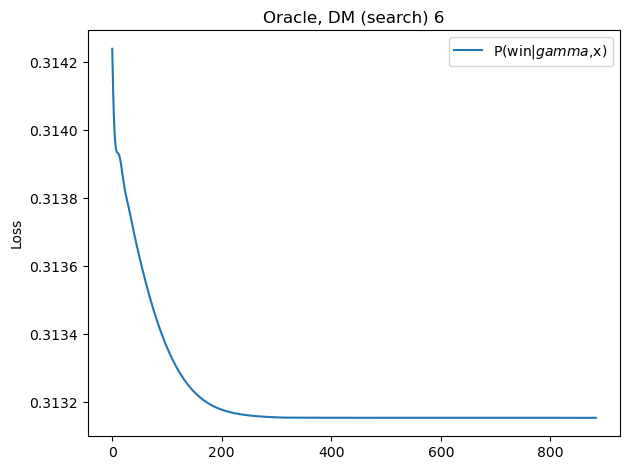

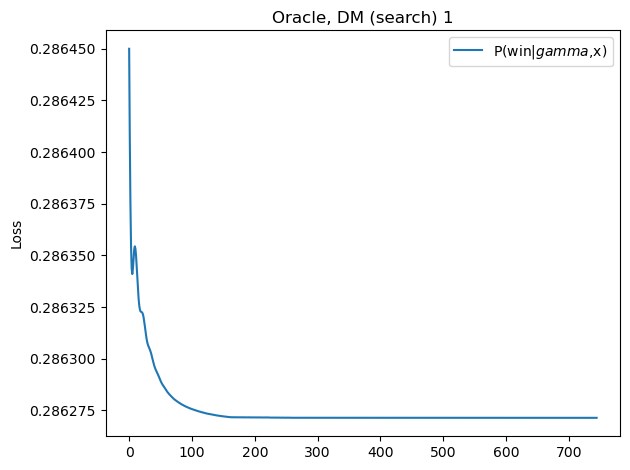

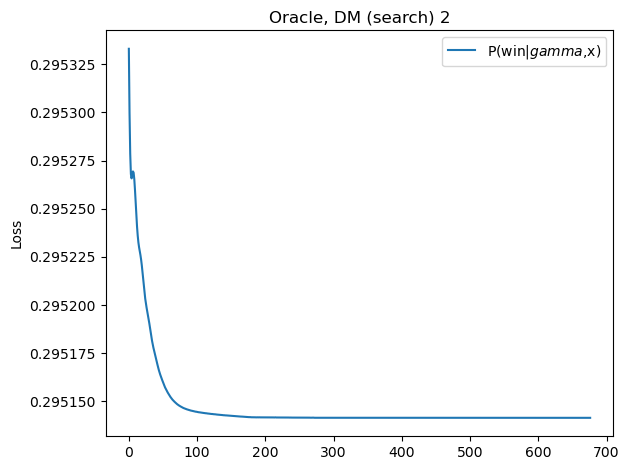

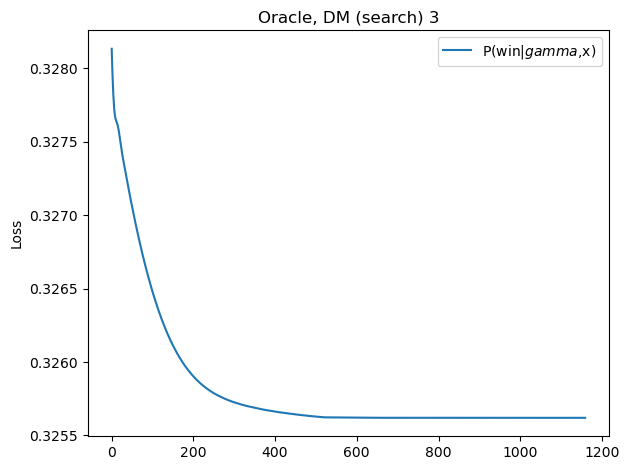

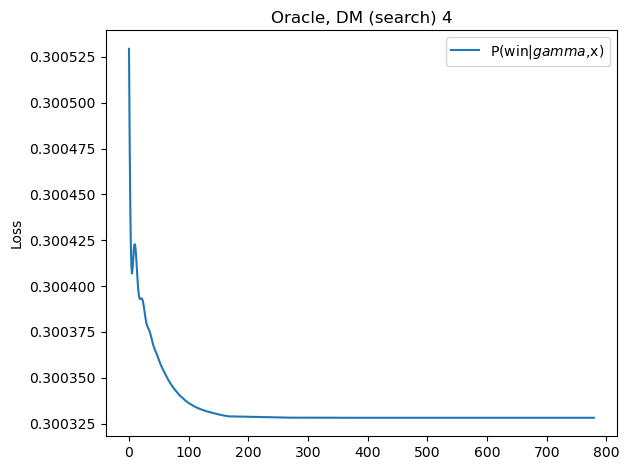

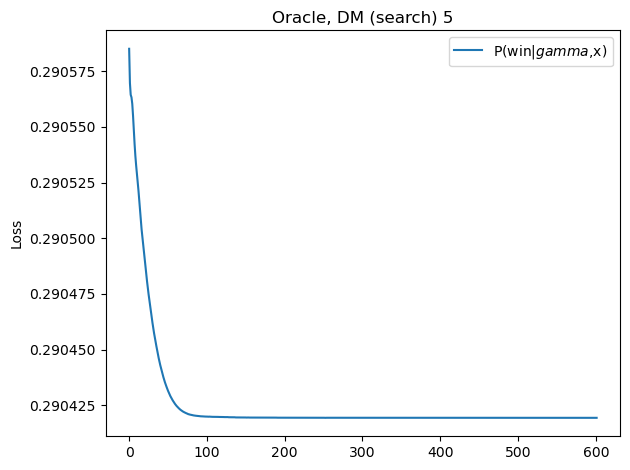

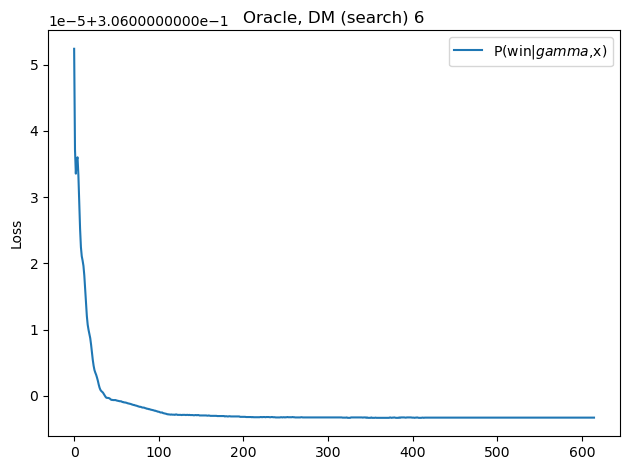

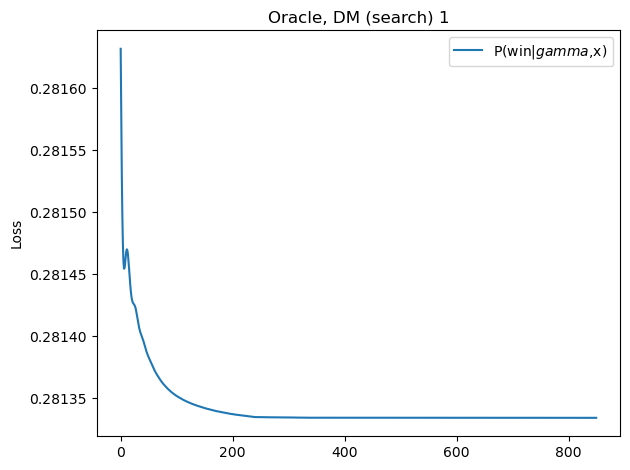

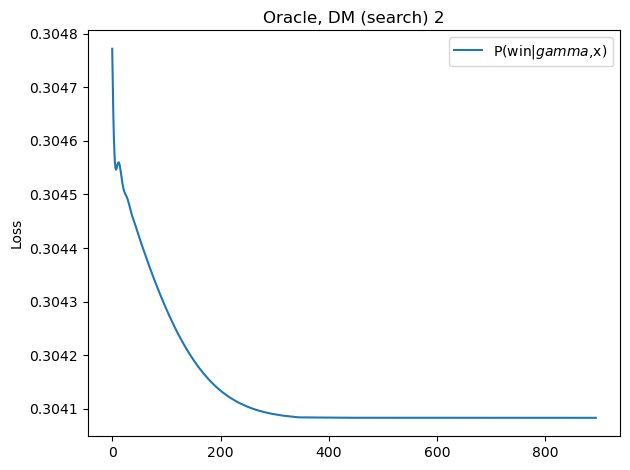

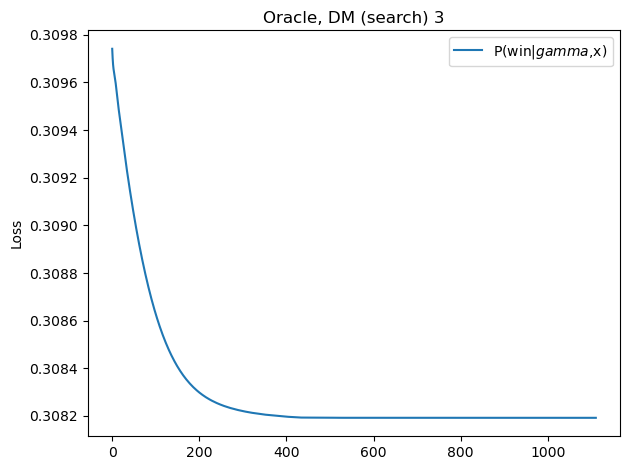

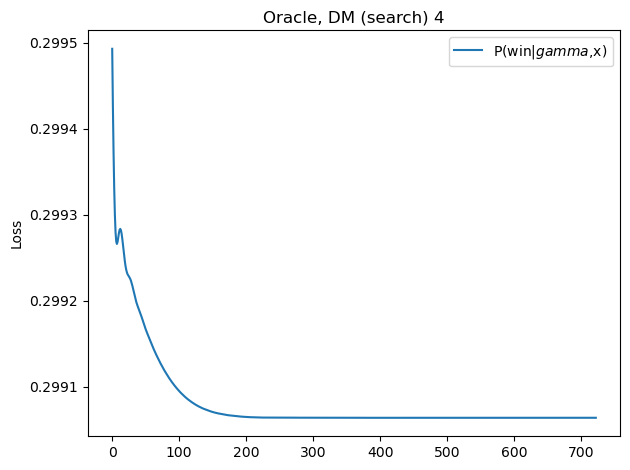

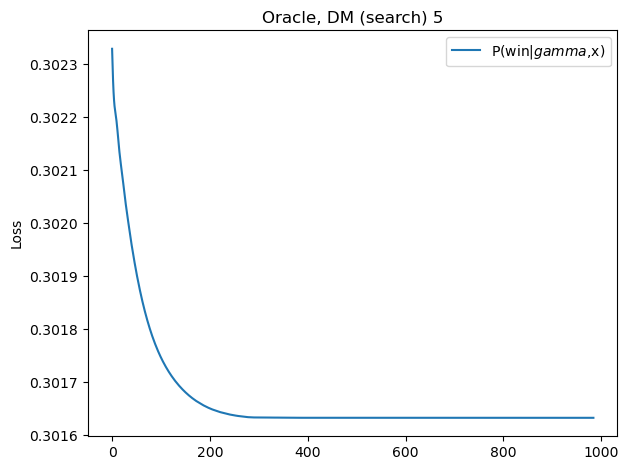

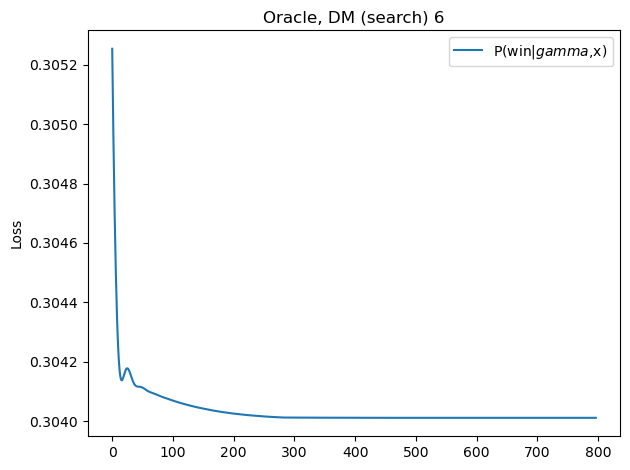

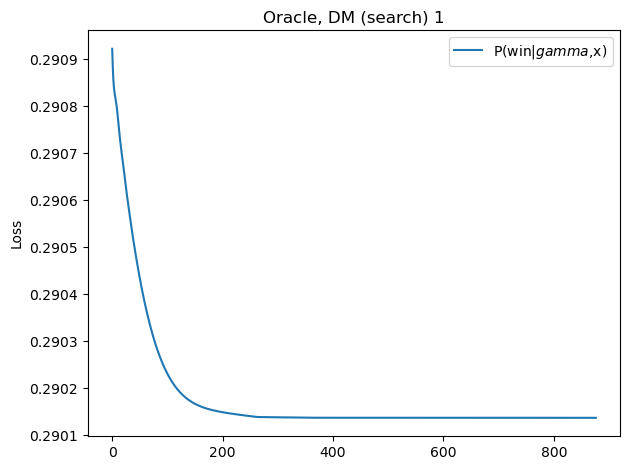

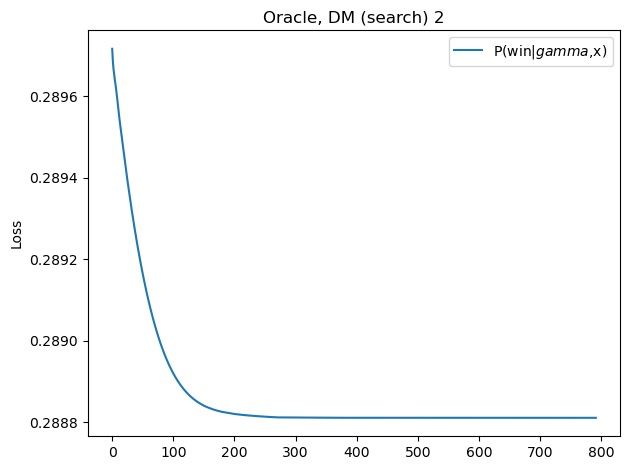

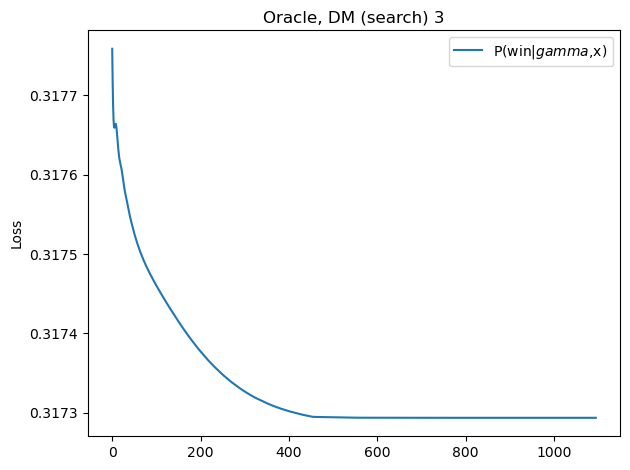

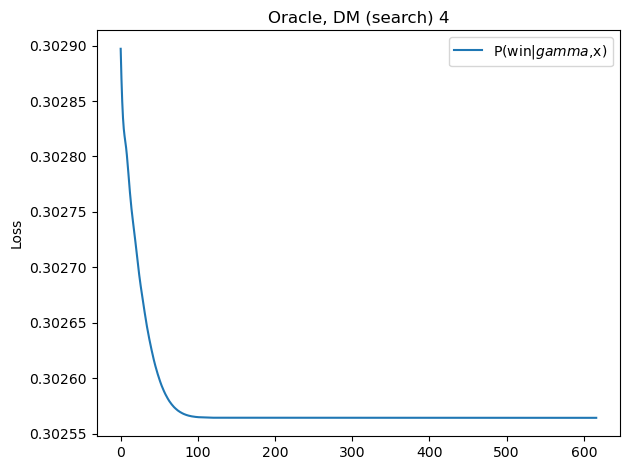

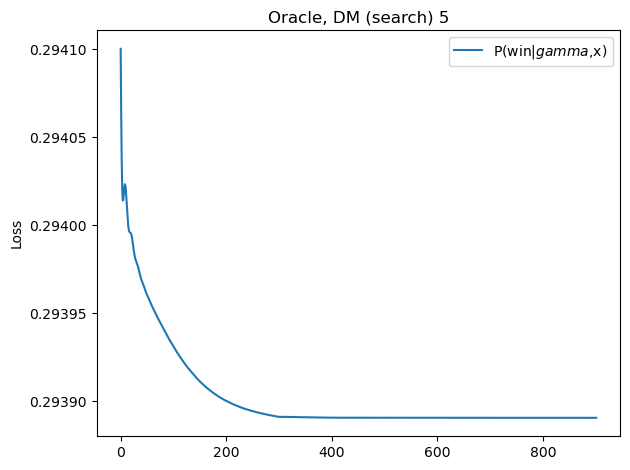

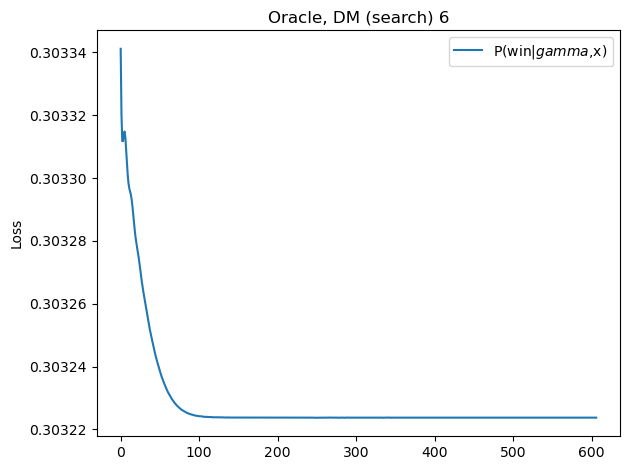

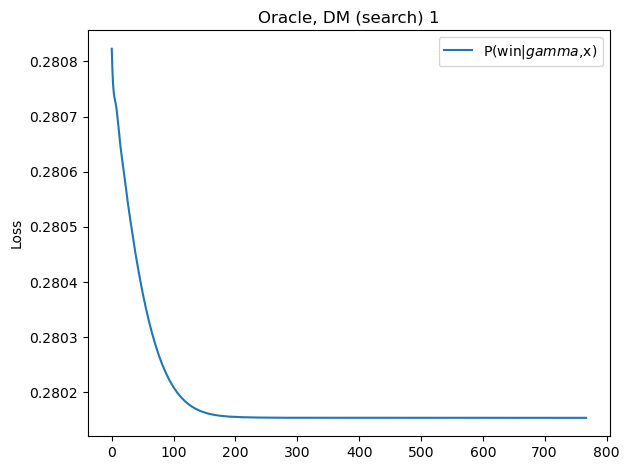

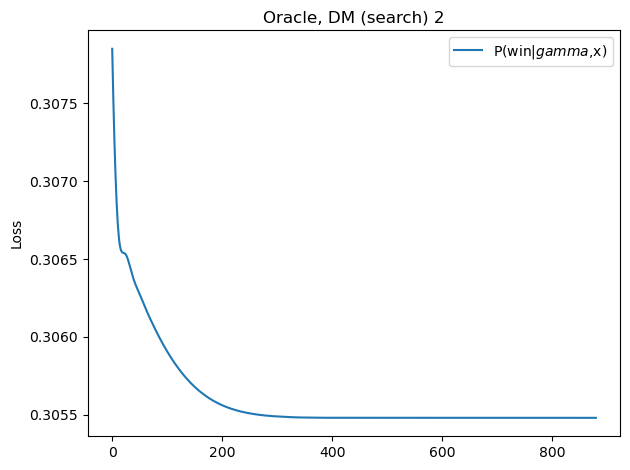

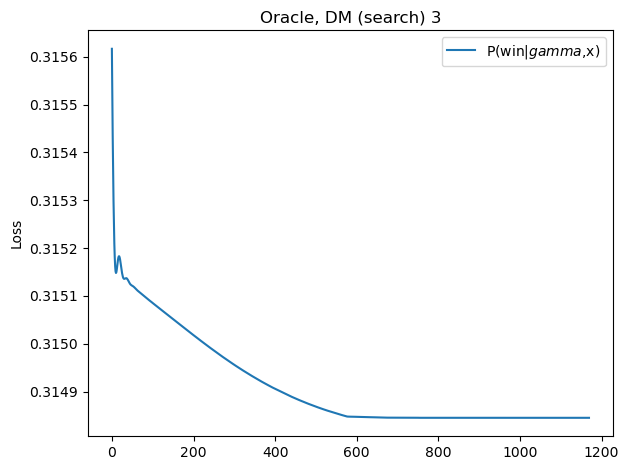

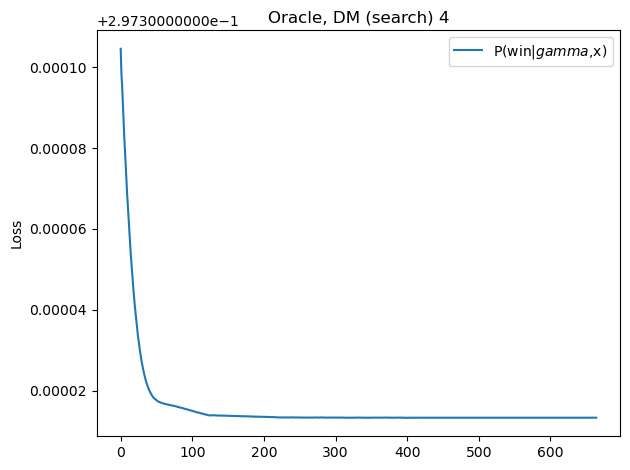

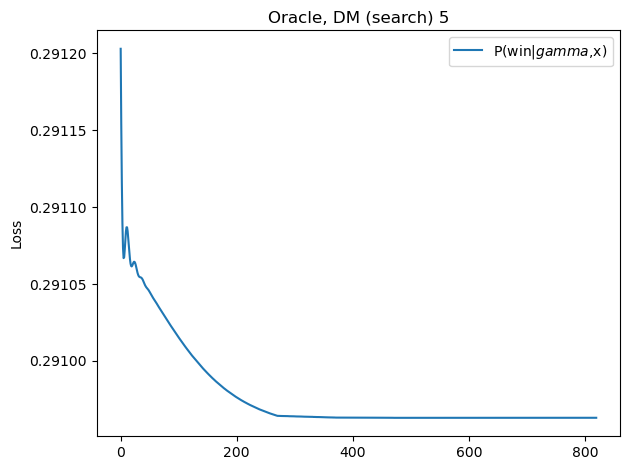

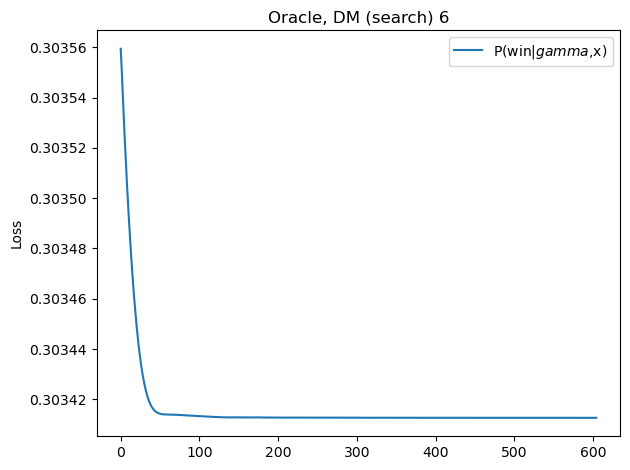

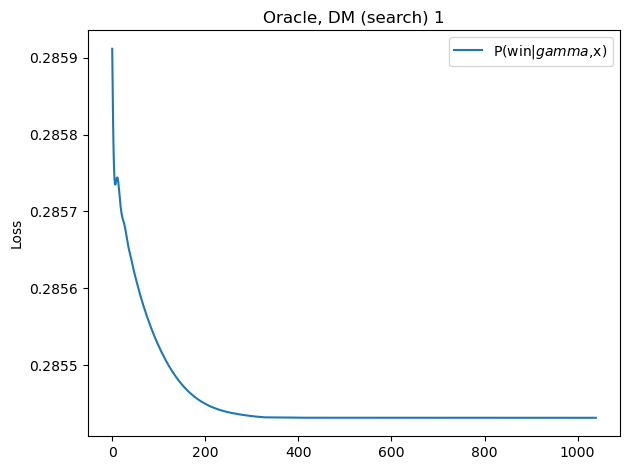

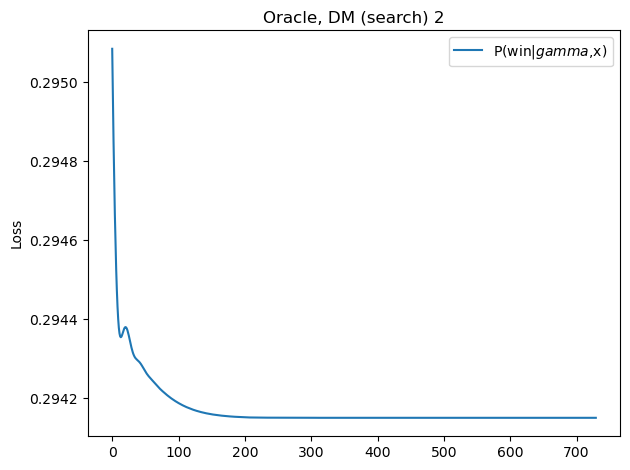

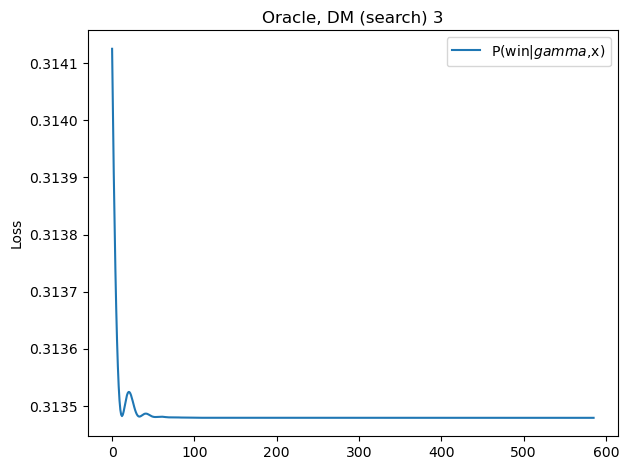

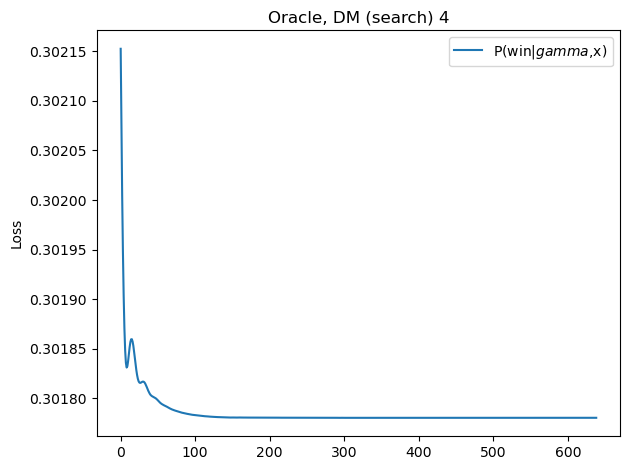

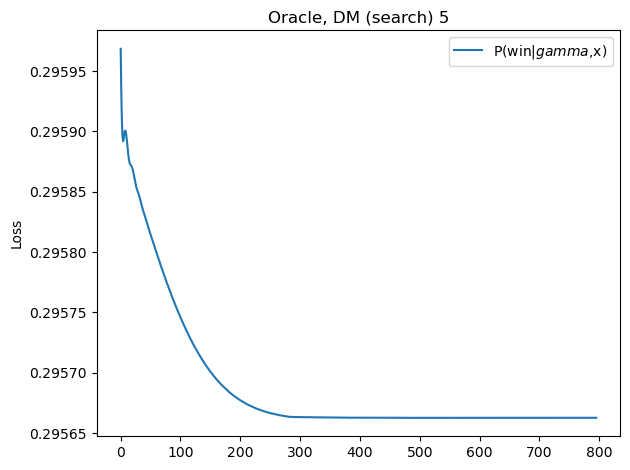

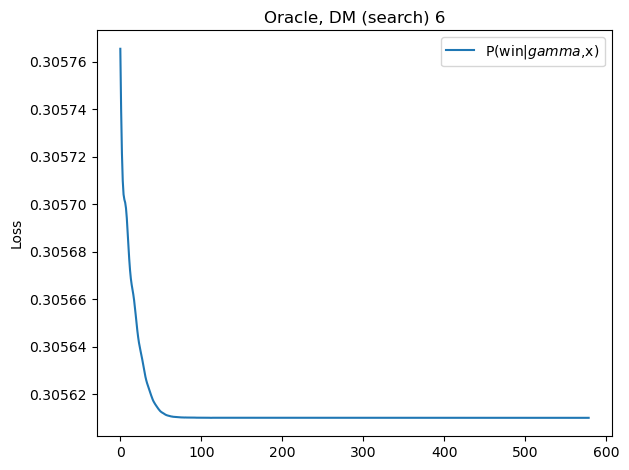

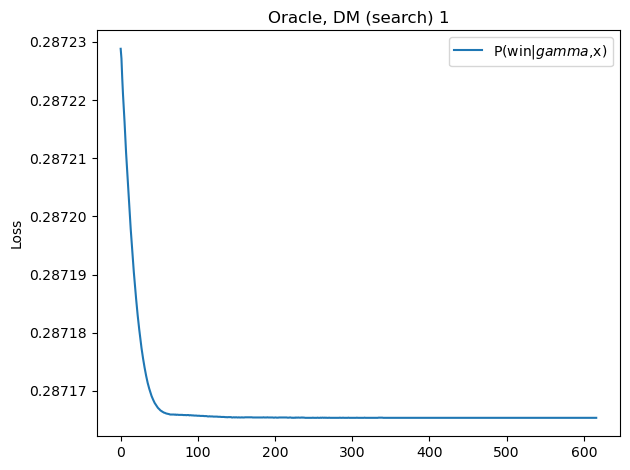

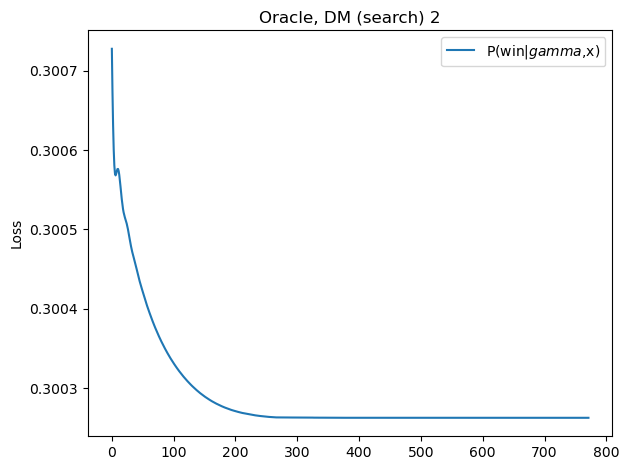

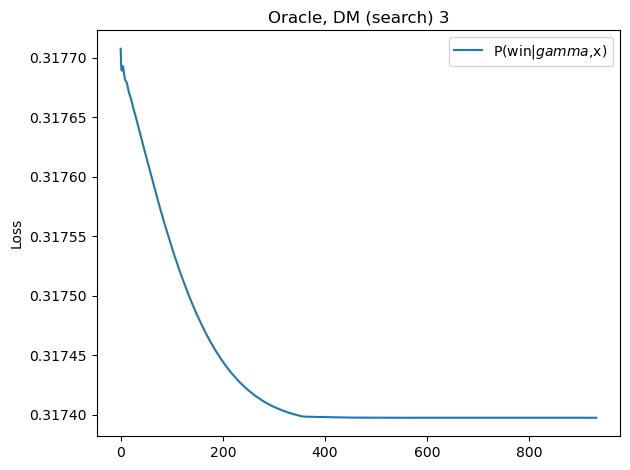

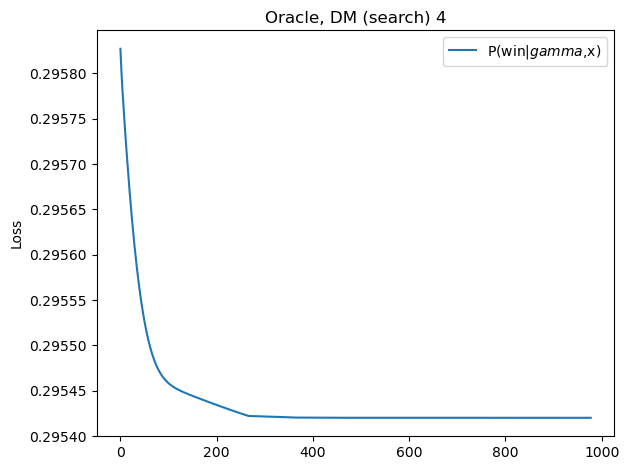

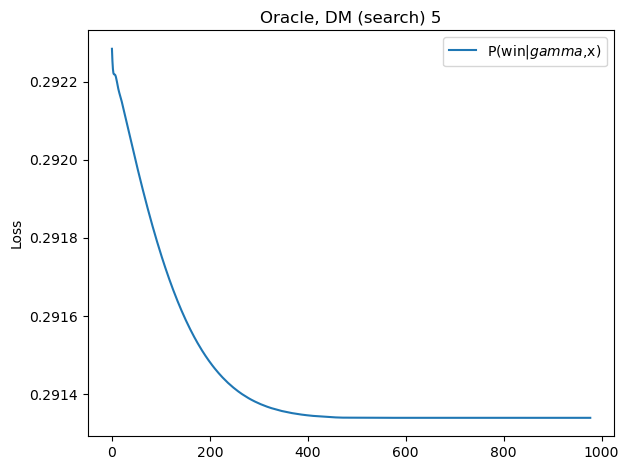

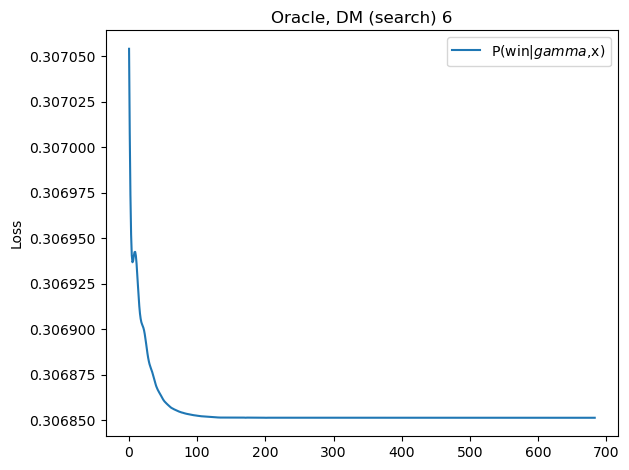

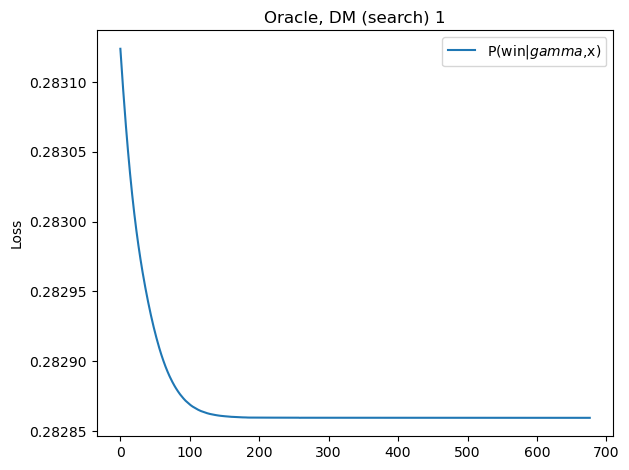

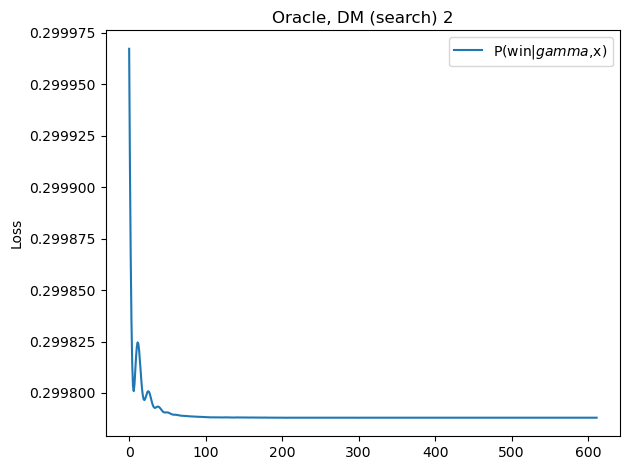

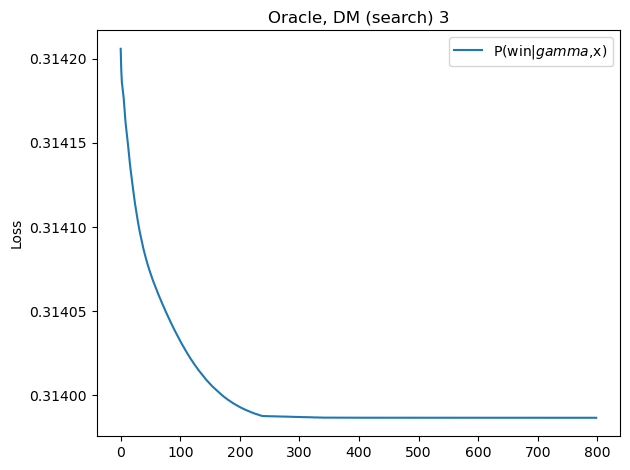

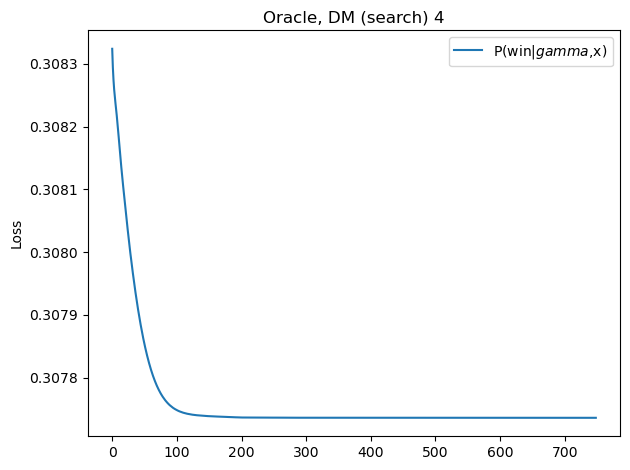

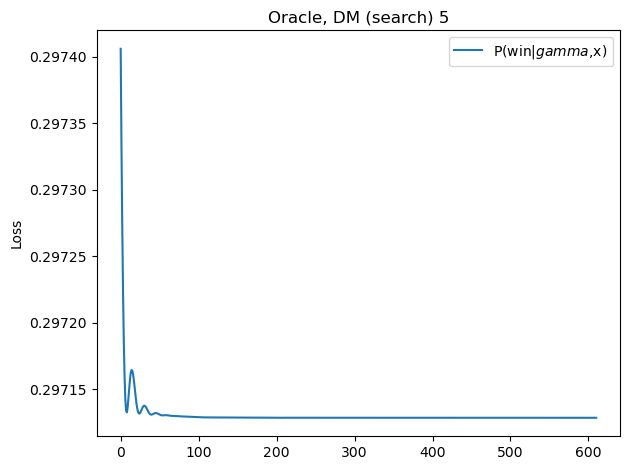

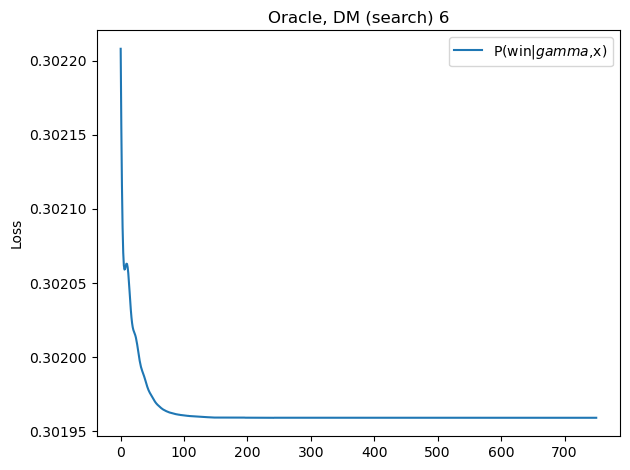

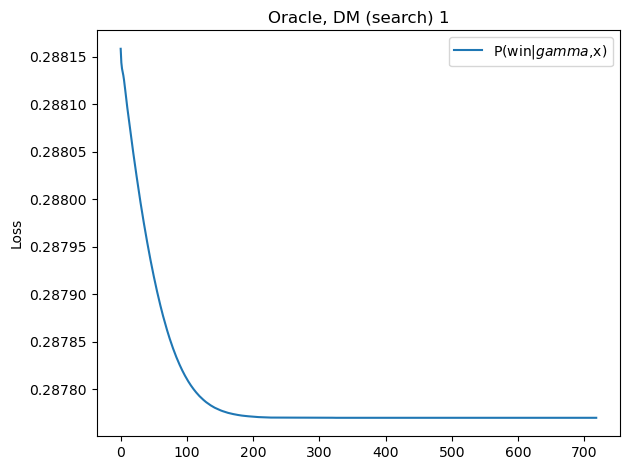

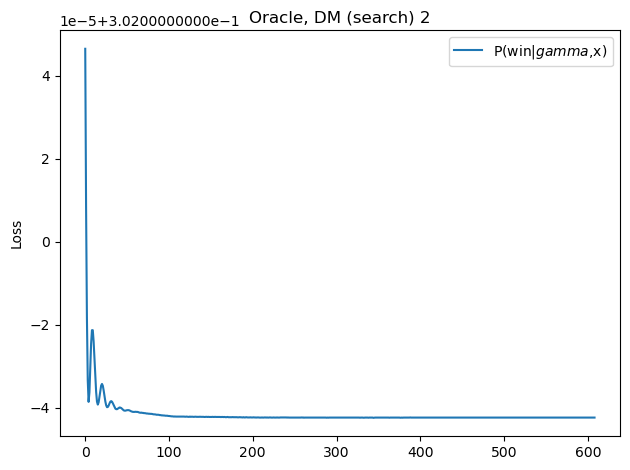

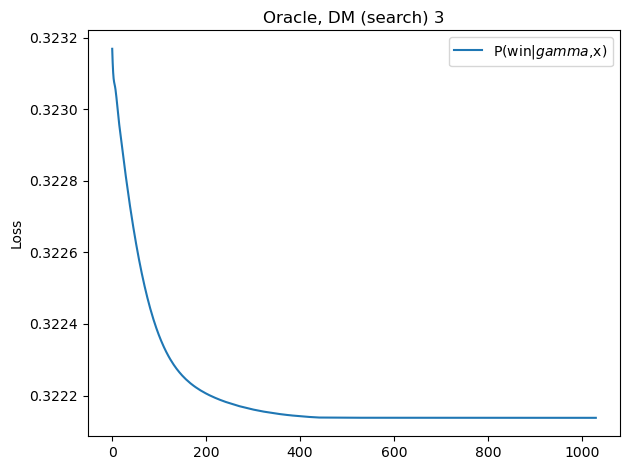

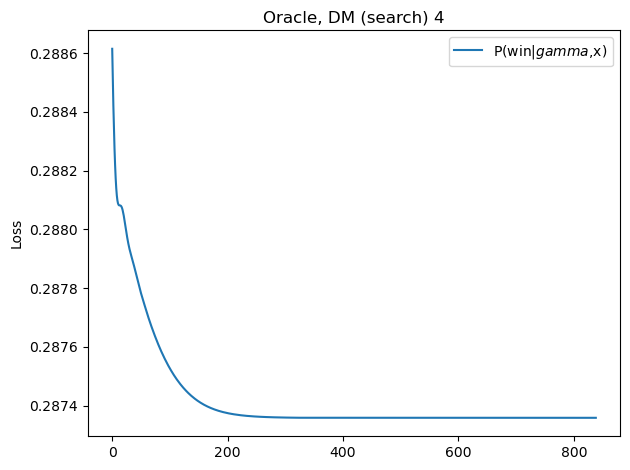

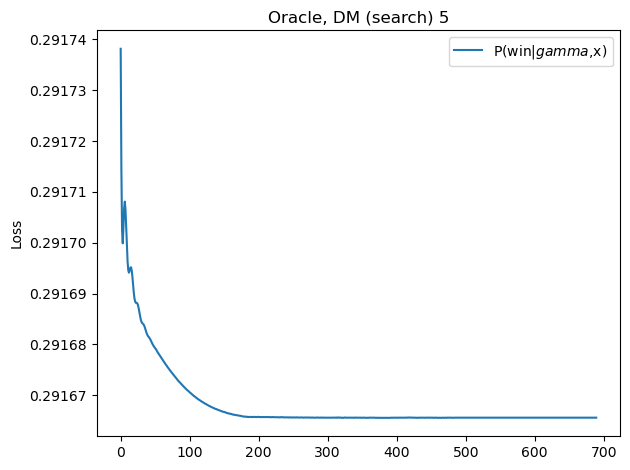

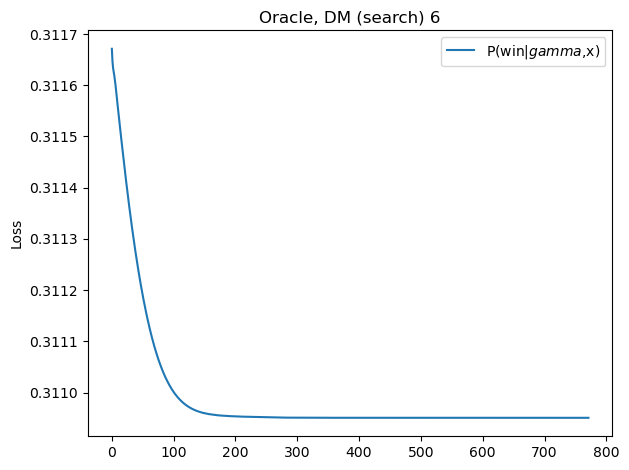

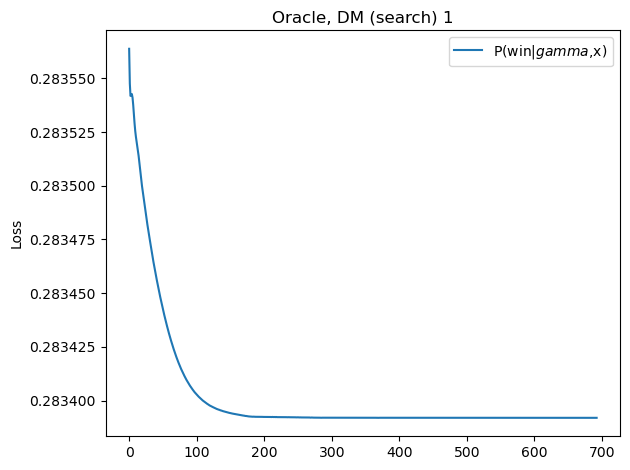

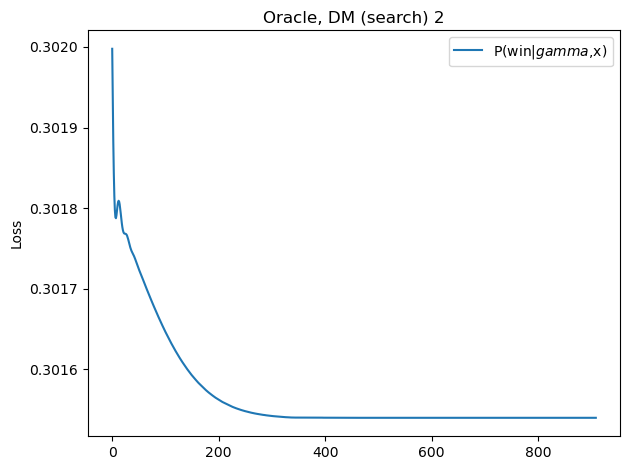

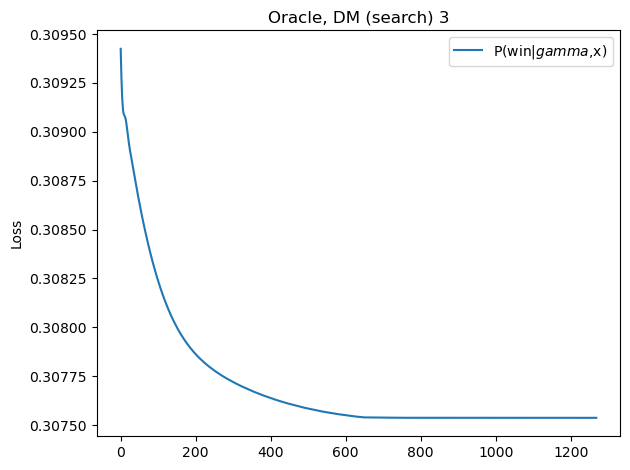

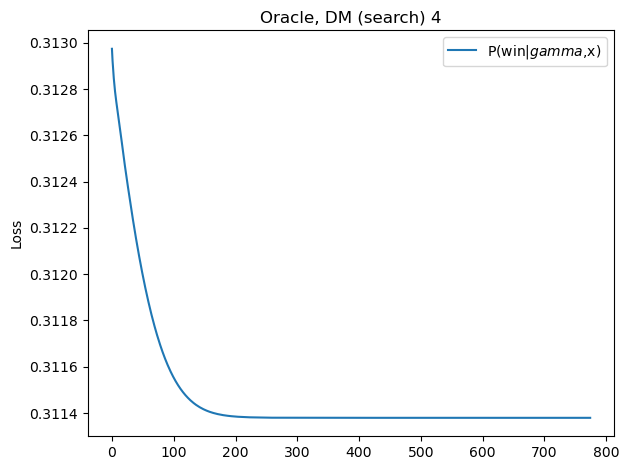

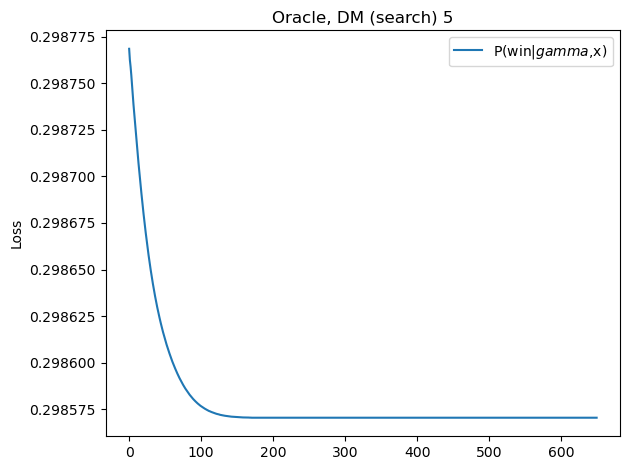

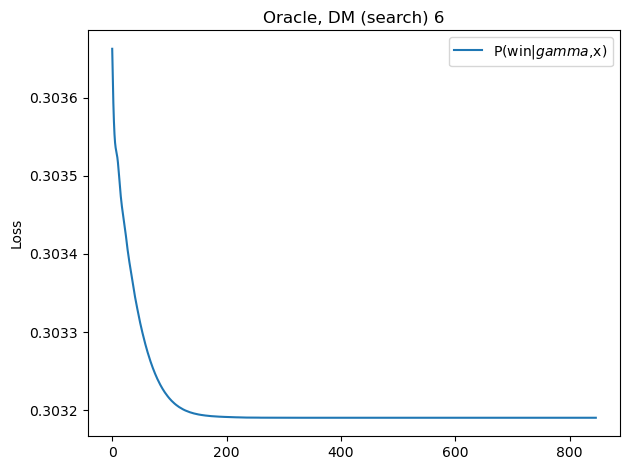

In [4]:
shaded_revenue, shaded_welfare, shaded_surplus = run_repeated_auctions()

In [5]:
shaded_surplus

array([-0.01026061,  0.20068192,  0.24469956,  0.24213193,  0.23726551,
        0.23633784,  0.23469359,  0.24172039,  0.2278888 ,  0.23618941,
        0.22741716,  0.22461683,  0.22679644,  0.22500818,  0.22764594,
        0.22873978,  0.22455793,  0.22742693,  0.21581899,  0.21692261])

In [5]:
def set_truthful_bidders(agent_configs):
    for agent_config in agent_configs:        
        agent_config['bidder'] = {
            'type': 'TruthfulBidder',
            'kwargs': {}
        }
set_truthful_bidders(agent_configs)
truthful_revenue, truthful_welfare, truthful_surplus = run_repeated_auctions()

  0%|          | 0/20 [00:00<?, ?it/s]

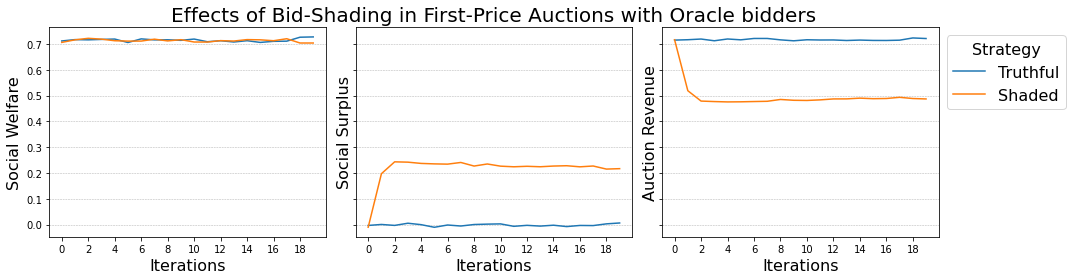

In [6]:
fontsize=16
fig, axes = plt.subplots(1, 3, sharey='row', figsize=(15,4))

axes[0].plot(truthful_welfare, label=f'Truthful')
axes[1].plot(truthful_surplus, label=f'Truthful')
axes[2].plot(truthful_revenue, label=f'Truthful')

axes[0].plot(shaded_welfare, label=f'Shaded')
axes[1].plot(shaded_surplus, label=f'Shaded')
axes[2].plot(shaded_revenue, label=f'Shaded')

axes[1].set_title('Effects of Bid-Shading in First-Price Auctions with Oracle bidders', fontsize=fontsize+4)

for i in range(3):
    axes[i].set_xlabel('Iterations', fontsize=fontsize)
    axes[i].set_xticks(list(range(0,len(truthful_revenue),2)))
    axes[i].grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    
axes[0].set_ylabel('Social Welfare', fontsize=fontsize)
axes[1].set_ylabel('Social Surplus', fontsize=fontsize)
axes[2].set_ylabel('Auction Revenue', fontsize=fontsize)

legend = axes[2].legend(loc='upper left',
                        bbox_to_anchor=(1.0, 1.0),
                        fontsize=fontsize)
legend.set_title('Strategy', prop={'size': fontsize})
fig.tight_layout()

plt.show()

The leftmost plot shows social welfare (the sum of generated welfare over all participants in the auction).
Whether participants shade their bids (or not) does not have affect welfare: indeed, the value that is generated by the ads that are shown remains unchanged.

The middle plot shows social surplus.
Bidding truthfully in a first-price auction gives an expected surplus of 0.
As bidders start to shade their bids, we can see that bidders succesfully generate surplus.

The rightmost plot shows revenue for the auctioneer.
When bidders bid truthfully, the monetary value for all generated welfare goes to the auctioneer.
As bidders start to shade their bids, we can see that revenue diminishes as surplus increases.